In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# me defined 
from dataloader import DatasetGenerator as dg
from modeling import ModelBuilder as mbuilder
from evaluation import Evaluator as ev

In [2]:
# check if running on gpu
if print(tf.config.list_physical_devices('GPU')):
    print("Running on GPU")
else:
    print("Running on CPU")

Running on GPU


Synthetic Data

In [3]:
# 4 input values, each Gaussian distributed with 0 mean and 1 stdev
# 1 output value, distance from the origin, AKA L2-norm
# 1000 instances for training, 1000 for testing

In [6]:
# finding alpha
def trial_run(alpha):
    """
    Run a training and validation with the alpha value passed
    
    
    :param alpha: dense weighting factor alpha
    :return: validation loss
    """

    # Generate synthetic data
    n_train = 1000
    n_test = 1000
    loader = dg(n_train, n_test, alpha=alpha)

    mb = mbuilder()
    
    eva = ev()

    # Create and train the model
    hiddens = [64, 32, 8]
    model = mb.create_model_pds(4, 2, hiddens)
    # summarize and plot the model
    # model.summary()

    history = mb.train_pds(
        model, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        learning_rate=1e-3, 
        epochs=400, batch_size=16)

    # plot_feature_space(model, X_train, y_train)
    # Plot the 2D feature space
    # eva.plot_feature_space(model, loader.X_train, loader.y_train)
    # eva.plot_feature_space(model, loader.X_test, loader.y_test)
    # add regression head
    extended_model = mb.add_regression_head(model)
    # train now with the regression stage with balanced loss
    history = mb.train_reg_head(
        extended_model, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        loader.reweights, 
        loader.val_reweights,
        learning_rate=1e-4,
        epochs=400, batch_size=16)
    # get the val mse
    val_mse = eva.evaluate(extended_model, loader.X_val, loader.y_val)

    return val_mse

alpha value 0.0
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 185ms/step - loss: 0.5640 - val_loss: 0.0272
Epoch 2/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1632 - val_loss: 0.0258
Epoch 3/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1722 - val_loss: 0.0297
Epoch 4/400
47/47 [==============================] - 8s 162ms/step - loss: 0.1656 - val_loss: 0.0356
Epoch 5/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1691 - val_loss: 0.0274
Epoch 6/400
47/47 [==============================] - 8s 179ms/step - loss: 0.1600 - val_loss: 0.0289
Epoch 7/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1522 - val_loss: 0.0424
Epoch 8/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1561 - val_loss: 0.0258
Epoch 9/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1625 - val_loss: 0.0234
Epoch 10/400
47/47 [=

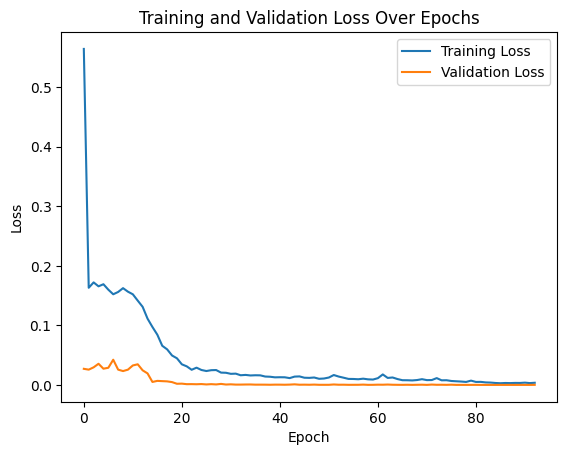

Epoch 1/84
63/63 [==============================] - 14s 201ms/step - loss: 0.0118
Epoch 2/84
63/63 [==============================] - 11s 167ms/step - loss: 0.0059
Epoch 3/84
63/63 [==============================] - 10s 165ms/step - loss: 0.0092
Epoch 4/84
63/63 [==============================] - 10s 156ms/step - loss: 0.0088
Epoch 5/84
63/63 [==============================] - 10s 151ms/step - loss: 0.0065
Epoch 6/84
63/63 [==============================] - 9s 149ms/step - loss: 0.0039
Epoch 7/84
63/63 [==============================] - 9s 146ms/step - loss: 0.0052
Epoch 8/84
63/63 [==============================] - 9s 146ms/step - loss: 0.0035
Epoch 9/84
63/63 [==============================] - 9s 143ms/step - loss: 0.0045
Epoch 10/84
63/63 [==============================] - 9s 146ms/step - loss: 0.0056
Epoch 11/84
63/63 [==============================] - 9s 142ms/step - loss: 0.0039
Epoch 12/84
63/63 [==============================] - 9s 145ms/step - loss: 0.0033
Epoch 13/84
63/63 [=

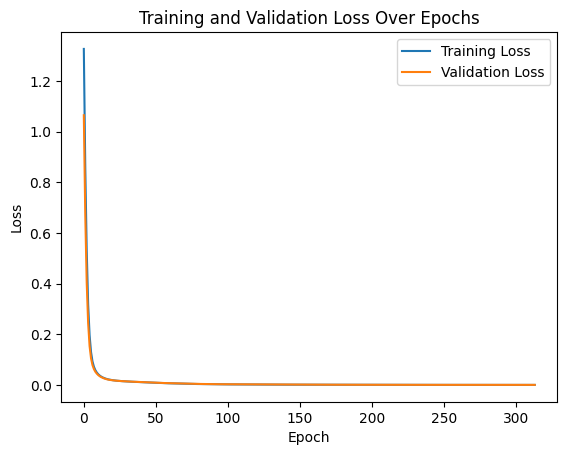

Epoch 1/305
63/63 [==============================] - 0s 7ms/step - loss: 2.2257e-04 - regression_head_loss: 2.2257e-04
Epoch 2/305
63/63 [==============================] - 0s 6ms/step - loss: 2.3928e-04 - regression_head_loss: 2.3928e-04
Epoch 3/305
63/63 [==============================] - 0s 5ms/step - loss: 2.2435e-04 - regression_head_loss: 2.2435e-04
Epoch 4/305
63/63 [==============================] - 0s 5ms/step - loss: 2.0998e-04 - regression_head_loss: 2.0998e-04
Epoch 5/305
63/63 [==============================] - 0s 6ms/step - loss: 2.0203e-04 - regression_head_loss: 2.0203e-04
Epoch 6/305
63/63 [==============================] - 0s 5ms/step - loss: 1.9861e-04 - regression_head_loss: 1.9861e-04
Epoch 7/305
63/63 [==============================] - 0s 6ms/step - loss: 2.0016e-04 - regression_head_loss: 2.0016e-04
Epoch 8/305
63/63 [==============================] - 0s 6ms/step - loss: 2.1721e-04 - regression_head_loss: 2.1721e-04
Epoch 9/305
63/63 [=============================

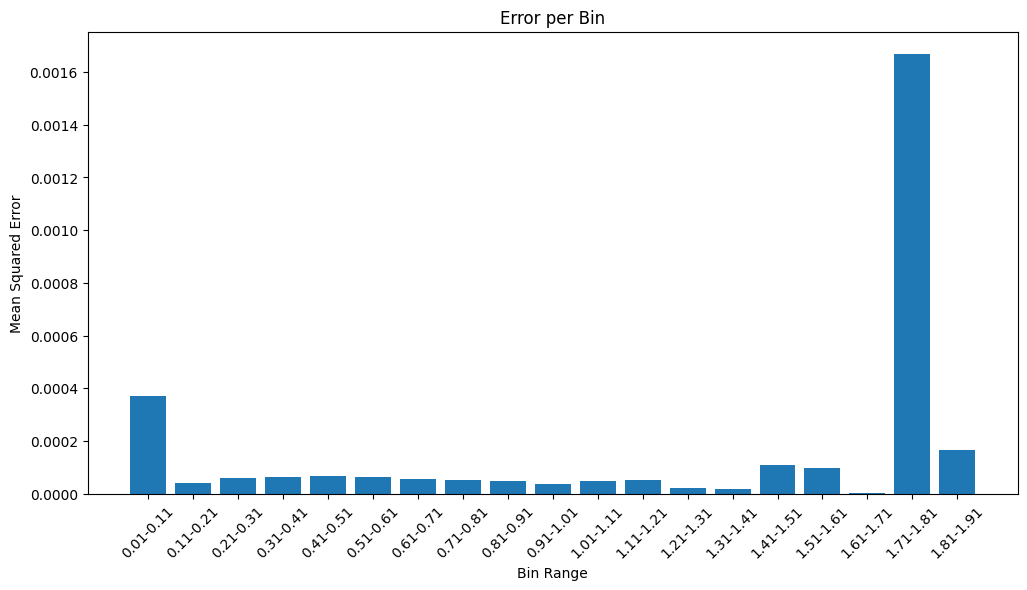

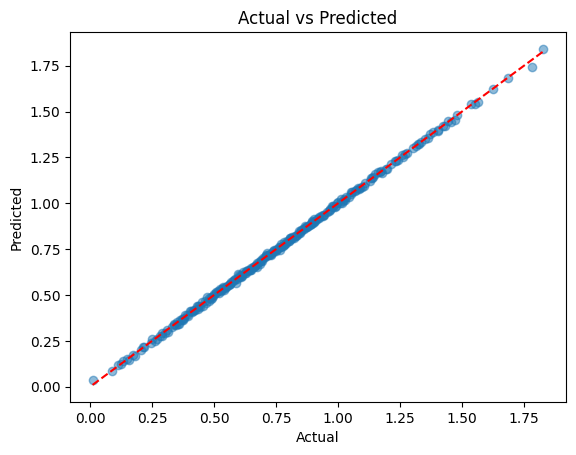

Sample with y = 0.6728805707053739 belongs to bin 7 and has an error of 0.0196658180312711
Sample with y = 1.473321681781767 belongs to bin 15 and has an error of 0.021140104099271806
Sample with y = 0.5893189741075904 belongs to bin 6 and has an error of 0.02298818358787602
Sample with y = 0.009744572974965908 belongs to bin 1 and has an error of 0.0264577385408422
Sample with y = 1.782925848130211 belongs to bin 18 and has an error of 0.040872577790245224
alpha value 0.1
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 175ms/step - loss: 0.1912 - val_loss: 0.0027
Epoch 2/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1301 - val_loss: 0.0155
Epoch 3/400
47/47 [==============================] - 8s 172ms/step - loss: 0.1278 - val_loss: 0.0151
Epoch 4/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1240 - val_loss: 0.0211
Epoch 5/400
47/47 [==============================] - 8s 173ms/st

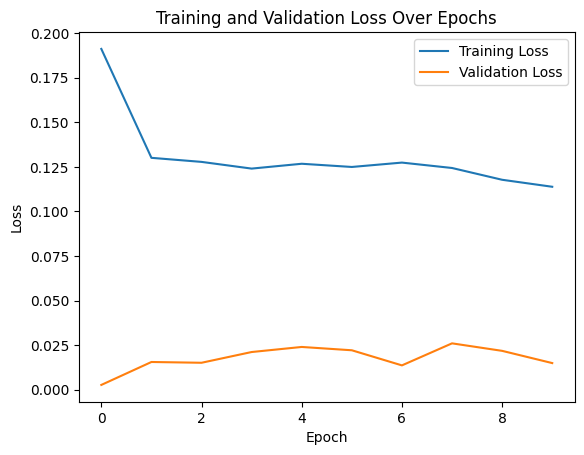

63/63 [==============================] - 11s 159ms/step - loss: 0.1402
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 3.7719 - regression_head_loss: 3.7719 - val_loss: 3.5992 - val_regression_head_loss: 3.5992
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 3.1960 - regression_head_loss: 3.1960 - val_loss: 2.6152 - val_regression_head_loss: 2.6152
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 1.7920 - regression_head_loss: 1.7920 - val_loss: 1.1203 - val_regression_head_loss: 1.1203
Epoch 4/400
47/47 [==============================] - 0s 7ms/step - loss: 0.6144 - regression_head_loss: 0.6144 - val_loss: 0.3693 - val_regression_head_loss: 0.3693
Epoch 5/400
47/47 [==============================] - 0s 7ms/step - loss: 0.3194 - regression_head_loss: 0.3194 - val_loss: 0.2940 - val_regression_head_loss: 0.2940
Epoch 6/400
47/47 [==============================]

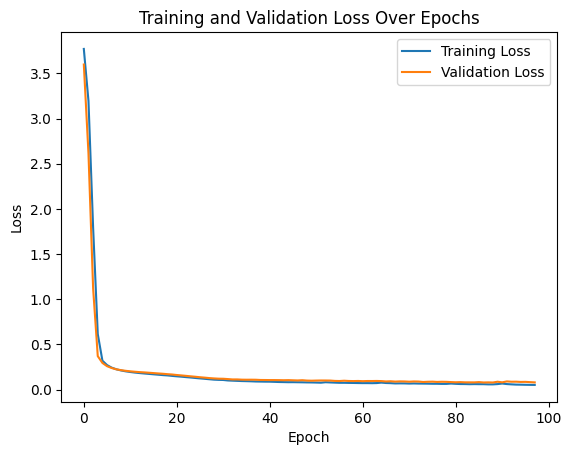

Epoch 1/89
63/63 [==============================] - 0s 5ms/step - loss: 0.0616 - regression_head_loss: 0.0616
Epoch 2/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0613 - regression_head_loss: 0.0613
Epoch 3/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0602 - regression_head_loss: 0.0602
Epoch 4/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0572 - regression_head_loss: 0.0572
Epoch 5/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0563 - regression_head_loss: 0.0563
Epoch 6/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0553 - regression_head_loss: 0.0553
Epoch 7/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0539 - regression_head_loss: 0.0539
Epoch 8/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0522 - regression_head_loss: 0.0522
Epoch 9/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0502 - regression_head_loss: 0.0502
Epoch 10/8

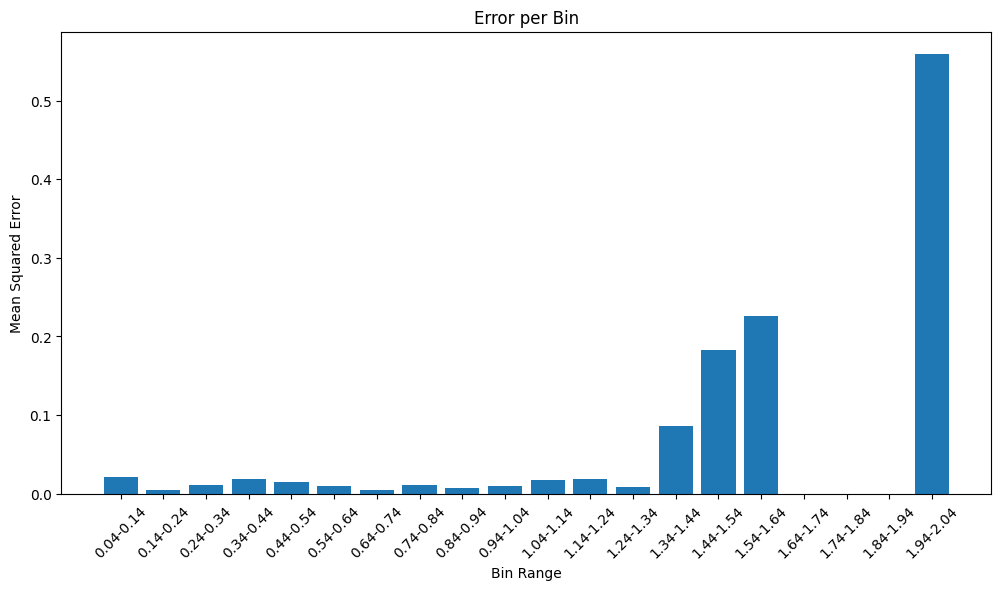

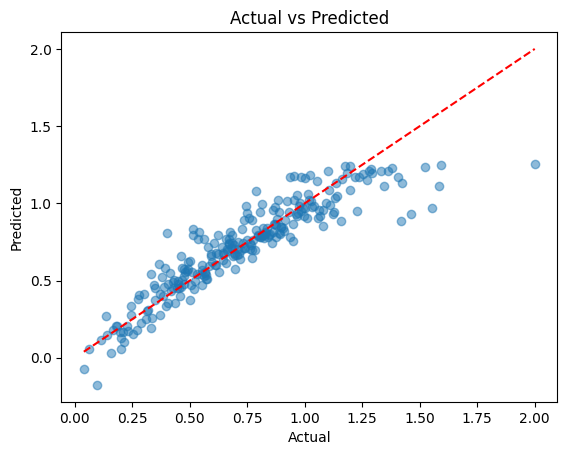

Sample with y = 1.5845759539702369 belongs to bin 16 and has an error of 0.4711938529112769
Sample with y = 1.4622298719060731 belongs to bin 15 and has an error of 0.5306762100828004
Sample with y = 1.419620643341745 belongs to bin 14 and has an error of 0.5333203179480683
Sample with y = 1.5541821674957952 belongs to bin 16 and has an error of 0.58287536665351
Sample with y = 2.0 belongs to bin 20 and has an error of 0.7481341361999512
alpha value 0.2
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 176ms/step - loss: 0.4375 - val_loss: 4.3560e-04
Epoch 2/400
47/47 [==============================] - 8s 167ms/step - loss: 0.1067 - val_loss: 6.4783e-04
Epoch 3/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1053 - val_loss: 0.0017
Epoch 4/400
47/47 [==============================] - 8s 166ms/step - loss: 0.1016 - val_loss: 0.0065
Epoch 5/400
47/47 [==============================] - 7s 157ms/step - loss: 0

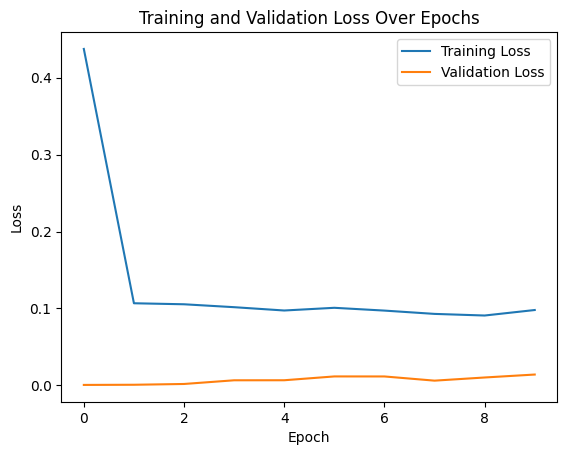

63/63 [==============================] - 10s 146ms/step - loss: 0.1017
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 0.1916 - regression_head_loss: 0.1916 - val_loss: 0.1506 - val_regression_head_loss: 0.1506
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 0.1472 - regression_head_loss: 0.1472 - val_loss: 0.1276 - val_regression_head_loss: 0.1276
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1288 - regression_head_loss: 0.1288 - val_loss: 0.1170 - val_regression_head_loss: 0.1170
Epoch 4/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1186 - regression_head_loss: 0.1186 - val_loss: 0.1099 - val_regression_head_loss: 0.1099
Epoch 5/400
47/47 [==============================] - 0s 7ms/step - loss: 0.1114 - regression_head_loss: 0.1114 - val_loss: 0.1055 - val_regression_head_loss: 0.1055
Epoch 6/400
47/47 [==============================]

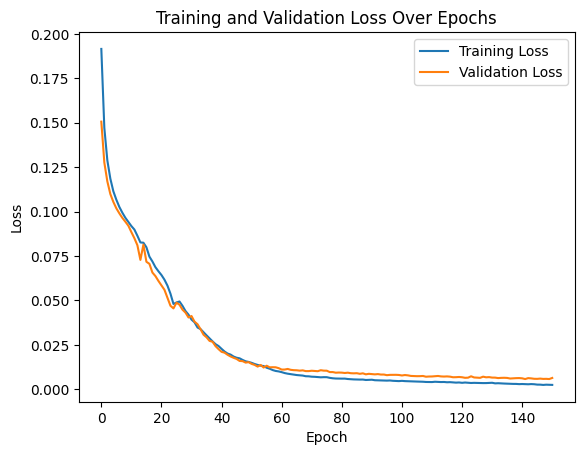

Epoch 1/142
63/63 [==============================] - 0s 7ms/step - loss: 0.0038 - regression_head_loss: 0.0038
Epoch 2/142
63/63 [==============================] - 0s 6ms/step - loss: 0.0036 - regression_head_loss: 0.0036
Epoch 3/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0035 - regression_head_loss: 0.0035
Epoch 4/142
63/63 [==============================] - 0s 6ms/step - loss: 0.0033 - regression_head_loss: 0.0033
Epoch 5/142
63/63 [==============================] - 0s 7ms/step - loss: 0.0034 - regression_head_loss: 0.0034
Epoch 6/142
63/63 [==============================] - 0s 6ms/step - loss: 0.0032 - regression_head_loss: 0.0032
Epoch 7/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0030 - regression_head_loss: 0.0030
Epoch 8/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0030 - regression_head_loss: 0.0030
Epoch 9/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0029 - regression_head_loss: 0.0029
E

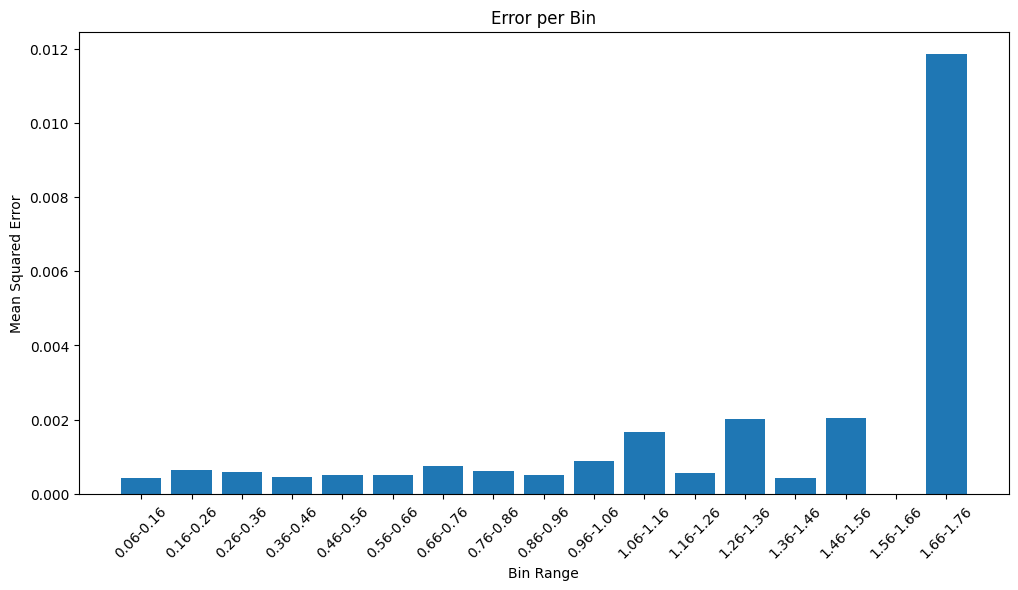

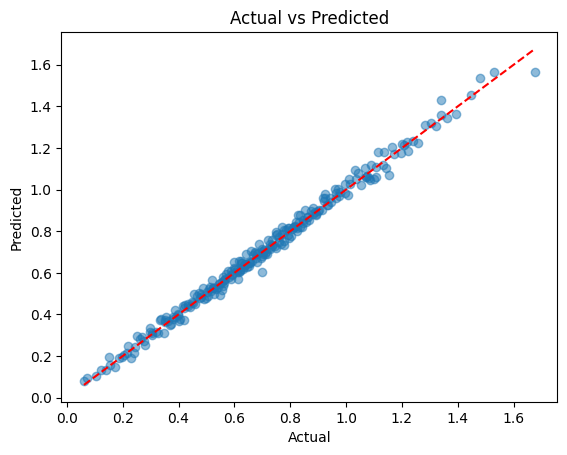

Sample with y = 1.1146147129606059 belongs to bin 11 and has an error of 0.06547607206594441
Sample with y = 1.15460408242741 belongs to bin 11 and has an error of 0.08680332215824493
Sample with y = 1.3392952888482939 belongs to bin 13 and has an error of 0.09227822132168906
Sample with y = 0.7000175014404446 belongs to bin 7 and has an error of 0.09563886078874173
Sample with y = 1.6760960670838962 belongs to bin 17 and has an error of 0.10896001781326636
alpha value 0.30000000000000004
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 183ms/step - loss: 0.6304 - val_loss: 0.0298
Epoch 2/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1434 - val_loss: 0.0255
Epoch 3/400
47/47 [==============================] - 8s 177ms/step - loss: 0.1443 - val_loss: 0.0252
Epoch 4/400
47/47 [==============================] - 8s 172ms/step - loss: 0.1446 - val_loss: 0.0176
Epoch 5/400
47/47 [=============================

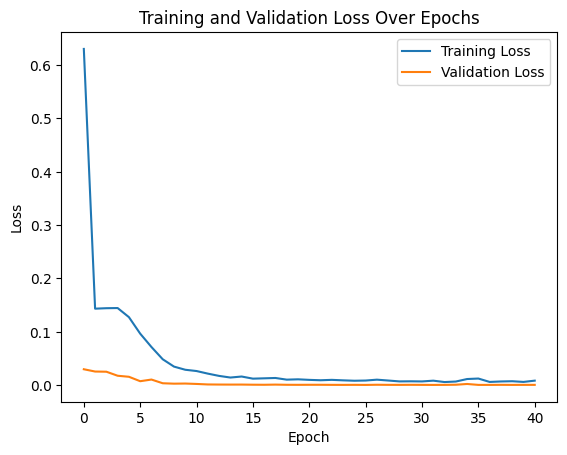

Epoch 1/32
63/63 [==============================] - 11s 151ms/step - loss: 0.0152
Epoch 2/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0126
Epoch 3/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0114
Epoch 4/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0106
Epoch 5/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0124
Epoch 6/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0104
Epoch 7/32
63/63 [==============================] - 10s 151ms/step - loss: 0.0101
Epoch 8/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0088
Epoch 9/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0082
Epoch 10/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0077
Epoch 11/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0101
Epoch 12/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0087
Epoch 13/32
63/63 [====

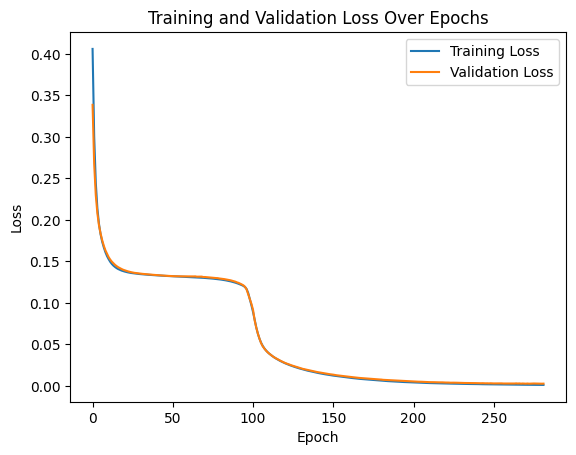

Epoch 1/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 2/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 3/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 4/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 5/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 6/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 7/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 8/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 9/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0013 - regression_head_loss: 0.0013
E

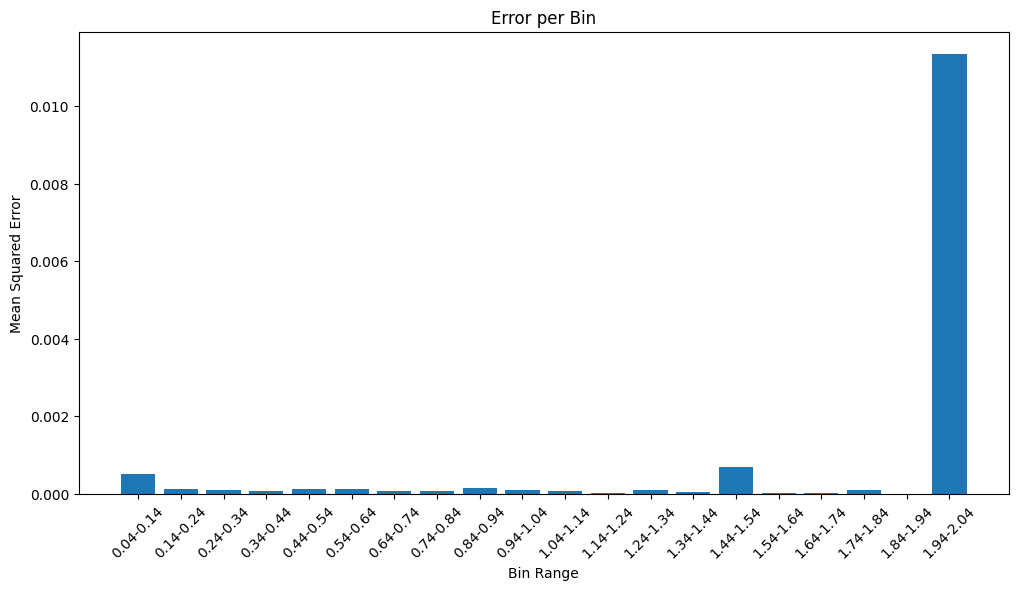

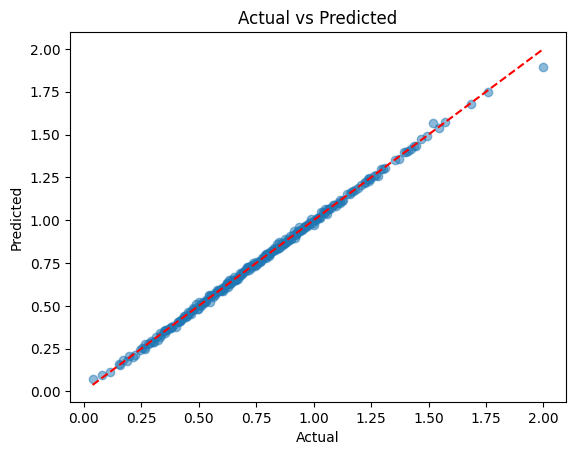

Sample with y = 0.5499596336457343 belongs to bin 6 and has an error of 0.028494391736707203
Sample with y = 1.0028163063861038 belongs to bin 10 and has an error of 0.029873715672602774
Sample with y = 0.03829395707420421 belongs to bin 1 and has an error of 0.03487604920097279
Sample with y = 1.5172116514794713 belongs to bin 15 and has an error of 0.05051543744875131
Sample with y = 2.0 belongs to bin 20 and has an error of 0.10653936862945557
alpha value 0.4
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 173ms/step - loss: 1.3406 - val_loss: 0.0255
Epoch 2/400
47/47 [==============================] - 8s 168ms/step - loss: 0.1862 - val_loss: 0.0353
Epoch 3/400
47/47 [==============================] - 8s 170ms/step - loss: 0.1857 - val_loss: 0.0378
Epoch 4/400
47/47 [==============================] - 8s 164ms/step - loss: 0.1944 - val_loss: 0.0310
Epoch 5/400
47/47 [==============================] - 7s 154ms/step - loss: 

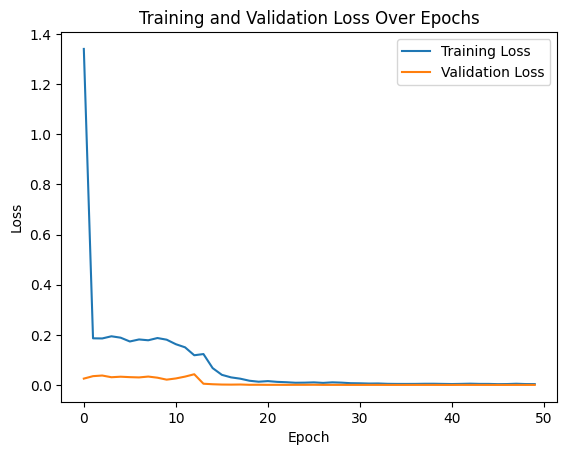

Epoch 1/41
63/63 [==============================] - 10s 147ms/step - loss: 0.0124
Epoch 2/41
63/63 [==============================] - 9s 142ms/step - loss: 0.0121
Epoch 3/41
63/63 [==============================] - 10s 157ms/step - loss: 0.0083
Epoch 4/41
63/63 [==============================] - 9s 149ms/step - loss: 0.0085
Epoch 5/41
63/63 [==============================] - 9s 144ms/step - loss: 0.0055
Epoch 6/41
63/63 [==============================] - 9s 147ms/step - loss: 0.0059
Epoch 7/41
63/63 [==============================] - 10s 151ms/step - loss: 0.0068
Epoch 8/41
63/63 [==============================] - 9s 147ms/step - loss: 0.0056
Epoch 9/41
63/63 [==============================] - 9s 147ms/step - loss: 0.0129
Epoch 10/41
63/63 [==============================] - 10s 159ms/step - loss: 0.0053
Epoch 11/41
63/63 [==============================] - 10s 158ms/step - loss: 0.0039
Epoch 12/41
63/63 [==============================] - 10s 166ms/step - loss: 0.0042
Epoch 13/41
63/63 [

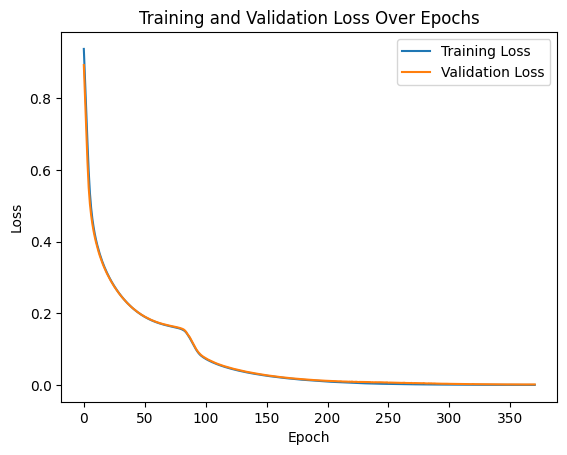

Epoch 1/362
63/63 [==============================] - 0s 6ms/step - loss: 9.6777e-04 - regression_head_loss: 9.6777e-04
Epoch 2/362
63/63 [==============================] - 0s 6ms/step - loss: 9.4908e-04 - regression_head_loss: 9.4908e-04
Epoch 3/362
63/63 [==============================] - 0s 6ms/step - loss: 8.9473e-04 - regression_head_loss: 8.9473e-04
Epoch 4/362
63/63 [==============================] - 0s 5ms/step - loss: 8.9725e-04 - regression_head_loss: 8.9725e-04
Epoch 5/362
63/63 [==============================] - 0s 6ms/step - loss: 8.9220e-04 - regression_head_loss: 8.9220e-04
Epoch 6/362
63/63 [==============================] - 0s 6ms/step - loss: 8.7681e-04 - regression_head_loss: 8.7681e-04
Epoch 7/362
63/63 [==============================] - 0s 7ms/step - loss: 8.9691e-04 - regression_head_loss: 8.9691e-04
Epoch 8/362
63/63 [==============================] - 1s 9ms/step - loss: 8.0595e-04 - regression_head_loss: 8.0595e-04
Epoch 9/362
63/63 [=============================

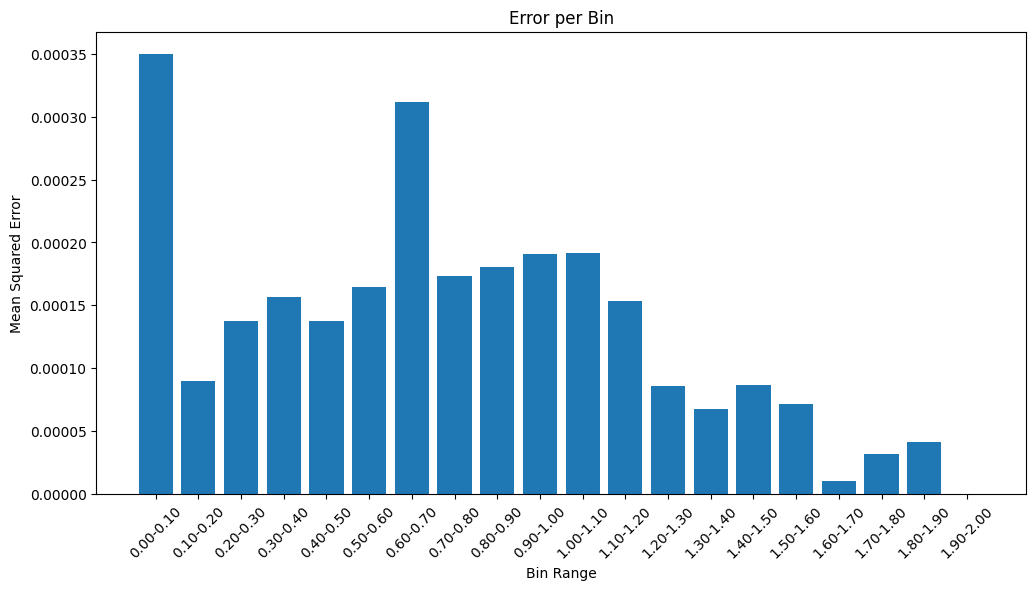

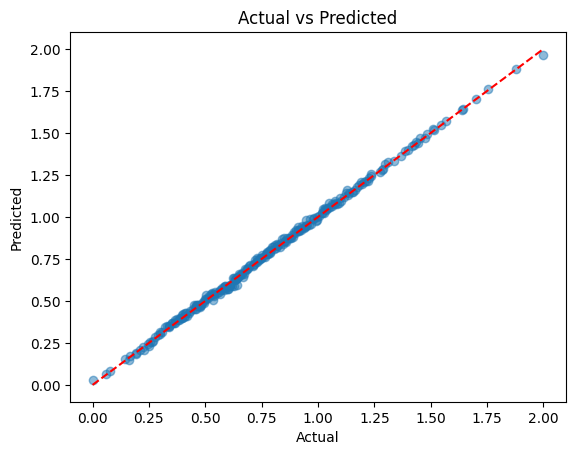

Sample with y = 1.1270295474310674 belongs to bin 12 and has an error of 0.03329216506282906
Sample with y = 2.0 belongs to bin 21 and has an error of 0.03484606742858887
Sample with y = 0.9455091906127684 belongs to bin 10 and has an error of 0.035169367736840984
Sample with y = 0.6260767931664141 belongs to bin 7 and has an error of 0.039425169917360114
Sample with y = 0.6396533929556963 belongs to bin 7 and has an error of 0.046864815875923393
alpha value 0.5
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 15s 270ms/step - loss: 0.6100 - val_loss: 0.0064
Epoch 2/400
47/47 [==============================] - 10s 208ms/step - loss: 0.1064 - val_loss: 0.0091
Epoch 3/400
47/47 [==============================] - 11s 238ms/step - loss: 0.1028 - val_loss: 0.0130
Epoch 4/400
47/47 [==============================] - 10s 207ms/step - loss: 0.1051 - val_loss: 0.0176
Epoch 5/400
47/47 [==============================] - 10s 205ms/step - lo

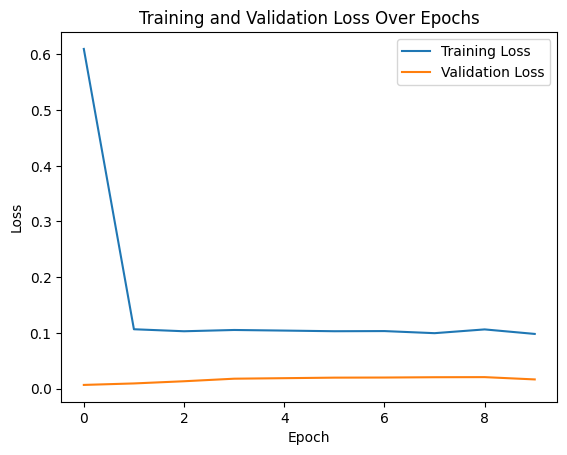

63/63 [==============================] - 15s 201ms/step - loss: 0.1063
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 4s 58ms/step - loss: 0.5629 - regression_head_loss: 0.5629 - val_loss: 0.5346 - val_regression_head_loss: 0.5346
Epoch 2/400
47/47 [==============================] - 4s 93ms/step - loss: 0.5111 - regression_head_loss: 0.5111 - val_loss: 0.4884 - val_regression_head_loss: 0.4884
Epoch 3/400
47/47 [==============================] - 5s 96ms/step - loss: 0.4716 - regression_head_loss: 0.4716 - val_loss: 0.4551 - val_regression_head_loss: 0.4551
Epoch 4/400
47/47 [==============================] - 8s 168ms/step - loss: 0.4439 - regression_head_loss: 0.4439 - val_loss: 0.4334 - val_regression_head_loss: 0.4334
Epoch 5/400
47/47 [==============================] - 4s 76ms/step - loss: 0.4259 - regression_head_loss: 0.4259 - val_loss: 0.4194 - val_regression_head_loss: 0.4194
Epoch 6/400
47/47 [==========================

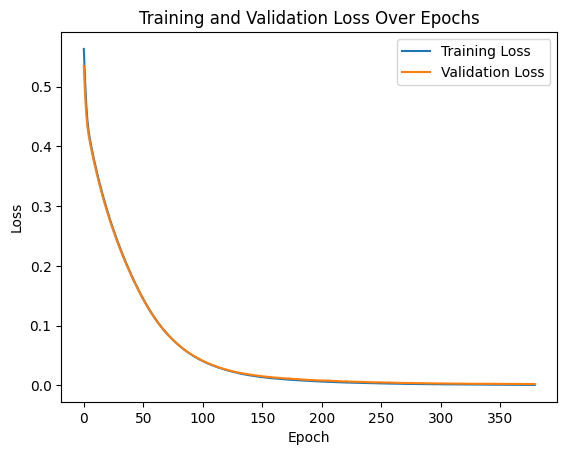

Epoch 1/371
63/63 [==============================] - 2s 34ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 2/371
63/63 [==============================] - 1s 21ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 3/371
63/63 [==============================] - 3s 45ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 4/371
63/63 [==============================] - 2s 39ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 5/371
63/63 [==============================] - 3s 49ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 6/371
63/63 [==============================] - 1s 17ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 7/371
63/63 [==============================] - 1s 16ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 8/371
63/63 [==============================] - 1s 22ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 9/371
63/63 [==============================] - 2s 34ms/step - loss: 0.0011 - regression_head_loss:

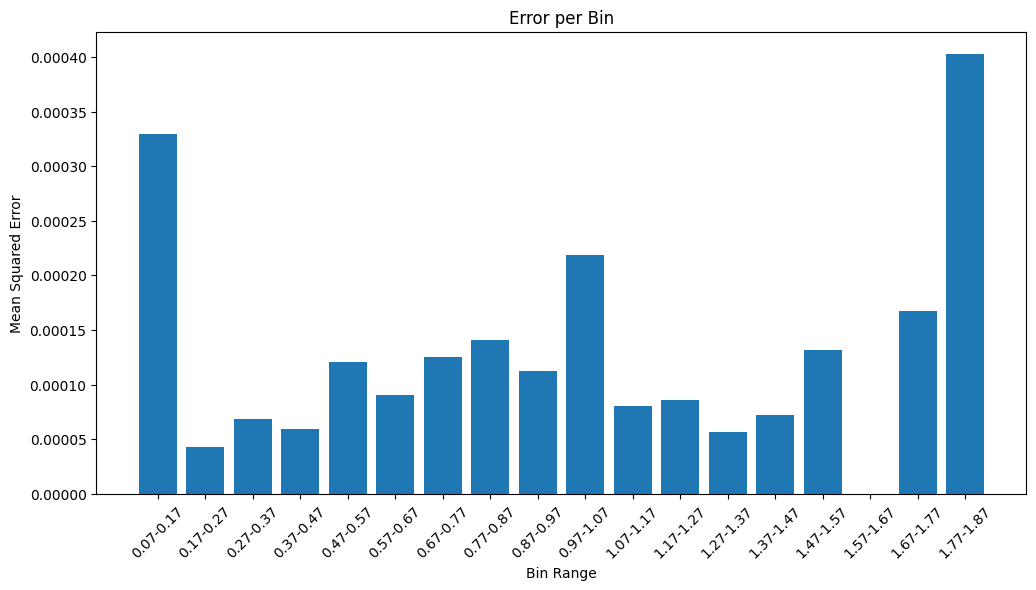

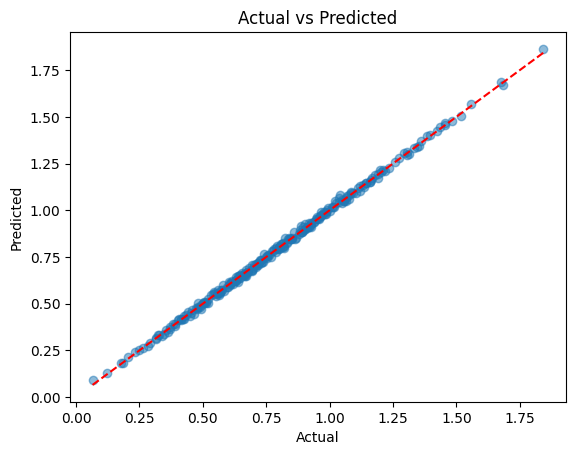

Sample with y = 1.0380576273527353 belongs to bin 10 and has an error of 0.02590936216447659
Sample with y = 1.0220903808161703 belongs to bin 10 and has an error of 0.028006131024649994
Sample with y = 0.8238213884910375 belongs to bin 8 and has an error of 0.028182841531392944
Sample with y = 0.8854206978999313 belongs to bin 9 and has an error of 0.031478267935640014
Sample with y = 1.0425209688582542 belongs to bin 10 and has an error of 0.041472227629172576
alpha value 0.6000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 183ms/step - loss: 0.6482 - val_loss: 0.0128
Epoch 2/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1588 - val_loss: 0.0268
Epoch 3/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1609 - val_loss: 0.0253
Epoch 4/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1603 - val_loss: 0.0254
Epoch 5/400
47/47 [=========================

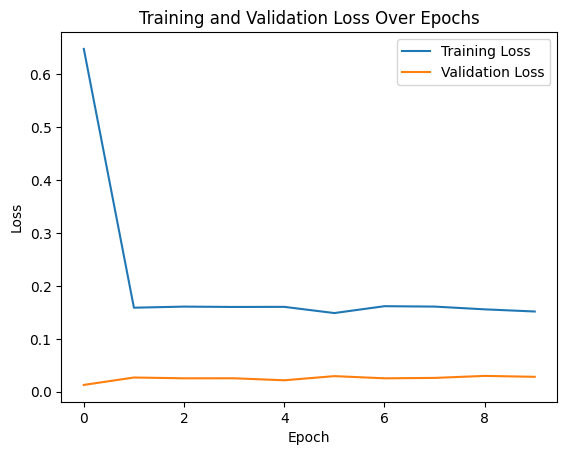

63/63 [==============================] - 12s 171ms/step - loss: 0.1667
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 13ms/step - loss: 4.0863 - regression_head_loss: 4.0863 - val_loss: 3.8071 - val_regression_head_loss: 3.8071
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 3.2715 - regression_head_loss: 3.2715 - val_loss: 2.6985 - val_regression_head_loss: 2.6985
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 2.0379 - regression_head_loss: 2.0379 - val_loss: 1.5703 - val_regression_head_loss: 1.5703
Epoch 4/400
47/47 [==============================] - 0s 7ms/step - loss: 1.1230 - regression_head_loss: 1.1230 - val_loss: 0.9265 - val_regression_head_loss: 0.9265
Epoch 5/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5723 - regression_head_loss: 0.5723 - val_loss: 0.4865 - val_regression_head_loss: 0.4865
Epoch 6/400
47/47 [==============================]

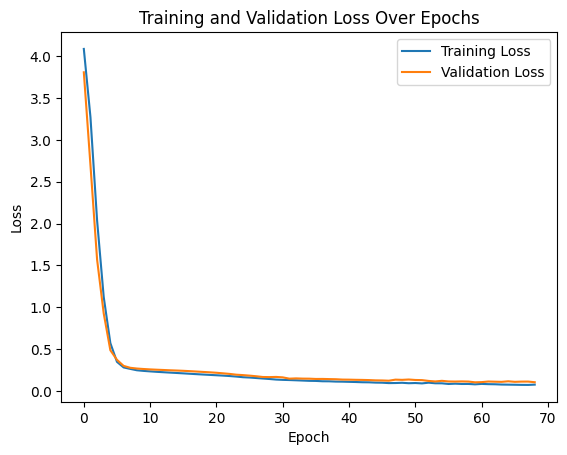

Epoch 1/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0862 - regression_head_loss: 0.0862
Epoch 2/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0861 - regression_head_loss: 0.0861
Epoch 3/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0833 - regression_head_loss: 0.0833
Epoch 4/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0828 - regression_head_loss: 0.0828
Epoch 5/60
63/63 [==============================] - 0s 6ms/step - loss: 0.0787 - regression_head_loss: 0.0787
Epoch 6/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0771 - regression_head_loss: 0.0771
Epoch 7/60
63/63 [==============================] - 0s 6ms/step - loss: 0.0756 - regression_head_loss: 0.0756
Epoch 8/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0755 - regression_head_loss: 0.0755
Epoch 9/60
63/63 [==============================] - 0s 6ms/step - loss: 0.0733 - regression_head_loss: 0.0733
Epoch 10/6

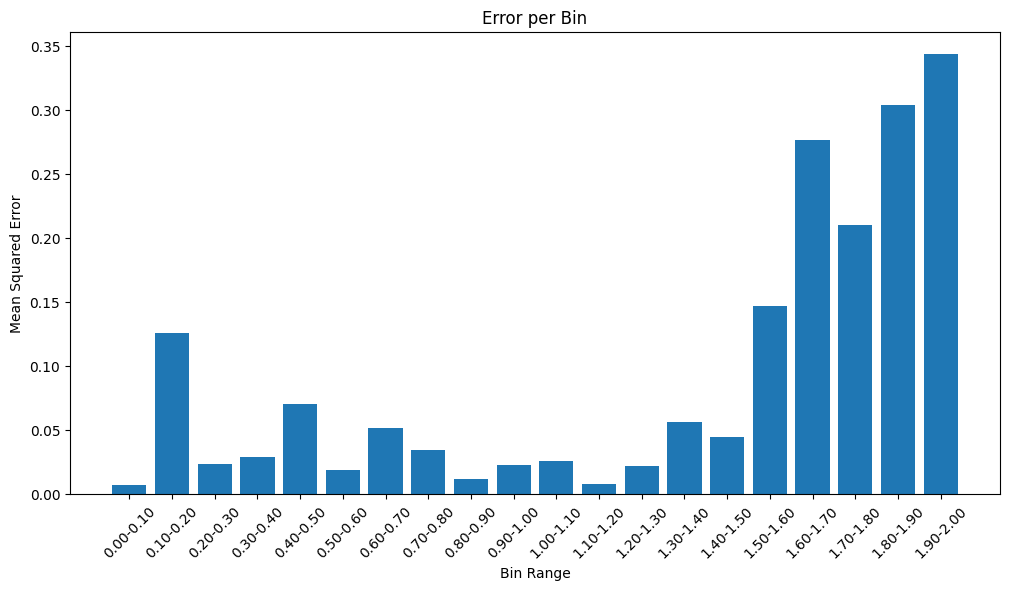

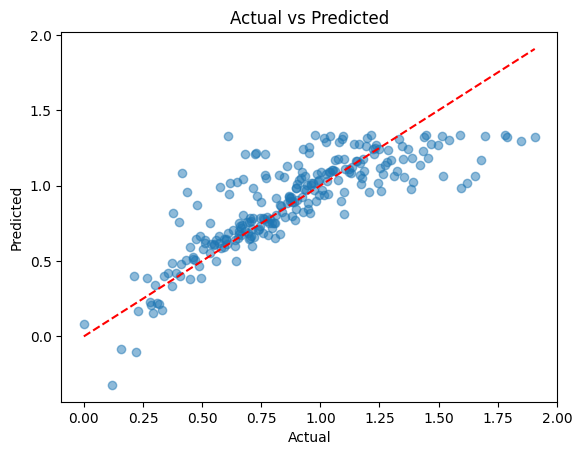

Sample with y = 1.6548870960071926 belongs to bin 17 and has an error of 0.5920313754871731
Sample with y = 1.6184581655288122 belongs to bin 17 and has an error of 0.5982130903029821
Sample with y = 1.5961980001970362 belongs to bin 16 and has an error of 0.6111750381036829
Sample with y = 0.4146189542437802 belongs to bin 5 and has an error of 0.6696736959789982
Sample with y = 0.6080601673997483 belongs to bin 7 and has an error of 0.719860150250093
alpha value 0.7000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 11s 205ms/step - loss: 0.5501 - val_loss: 0.0302
Epoch 2/400
47/47 [==============================] - 10s 221ms/step - loss: 0.1316 - val_loss: 0.0162
Epoch 3/400
47/47 [==============================] - 8s 179ms/step - loss: 0.1284 - val_loss: 0.0280
Epoch 4/400
47/47 [==============================] - 8s 176ms/step - loss: 0.1242 - val_loss: 0.0361
Epoch 5/400
47/47 [==============================] - 

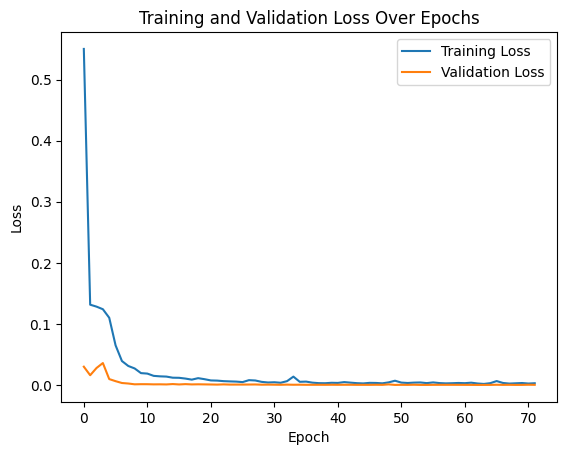

Epoch 1/63
63/63 [==============================] - 11s 156ms/step - loss: 0.0067
Epoch 2/63
63/63 [==============================] - 10s 155ms/step - loss: 0.0052
Epoch 3/63
63/63 [==============================] - 10s 155ms/step - loss: 0.0051
Epoch 4/63
63/63 [==============================] - 10s 155ms/step - loss: 0.0069
Epoch 5/63
63/63 [==============================] - 10s 156ms/step - loss: 0.0070
Epoch 6/63
63/63 [==============================] - 10s 155ms/step - loss: 0.0093
Epoch 7/63
63/63 [==============================] - 10s 156ms/step - loss: 0.0046
Epoch 8/63
63/63 [==============================] - 10s 154ms/step - loss: 0.0051
Epoch 9/63
63/63 [==============================] - 10s 160ms/step - loss: 0.0030
Epoch 10/63
63/63 [==============================] - 10s 165ms/step - loss: 0.0049
Epoch 11/63
63/63 [==============================] - 11s 168ms/step - loss: 0.0057
Epoch 12/63
63/63 [==============================] - 11s 168ms/step - loss: 0.0059
Epoch 13/63
6

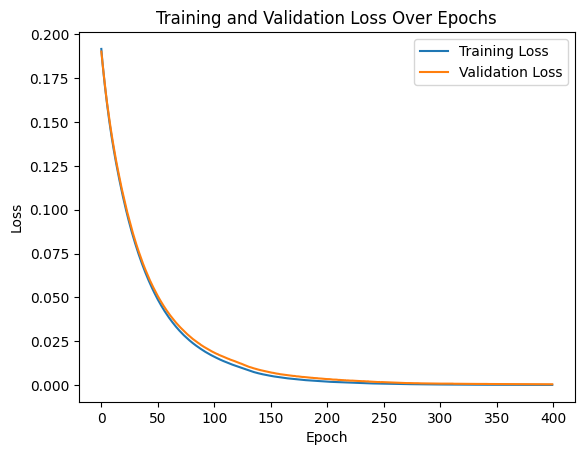

Epoch 1/395
63/63 [==============================] - 0s 6ms/step - loss: 2.2535e-04 - regression_head_loss: 2.2535e-04
Epoch 2/395
63/63 [==============================] - 0s 6ms/step - loss: 2.0100e-04 - regression_head_loss: 2.0100e-04
Epoch 3/395
63/63 [==============================] - 0s 7ms/step - loss: 1.8674e-04 - regression_head_loss: 1.8674e-04
Epoch 4/395
63/63 [==============================] - 0s 6ms/step - loss: 1.8340e-04 - regression_head_loss: 1.8340e-04
Epoch 5/395
63/63 [==============================] - 0s 5ms/step - loss: 1.7445e-04 - regression_head_loss: 1.7445e-04
Epoch 6/395
63/63 [==============================] - 0s 5ms/step - loss: 1.7399e-04 - regression_head_loss: 1.7399e-04
Epoch 7/395
63/63 [==============================] - 0s 5ms/step - loss: 1.6698e-04 - regression_head_loss: 1.6698e-04
Epoch 8/395
63/63 [==============================] - 0s 5ms/step - loss: 1.6900e-04 - regression_head_loss: 1.6900e-04
Epoch 9/395
63/63 [=============================

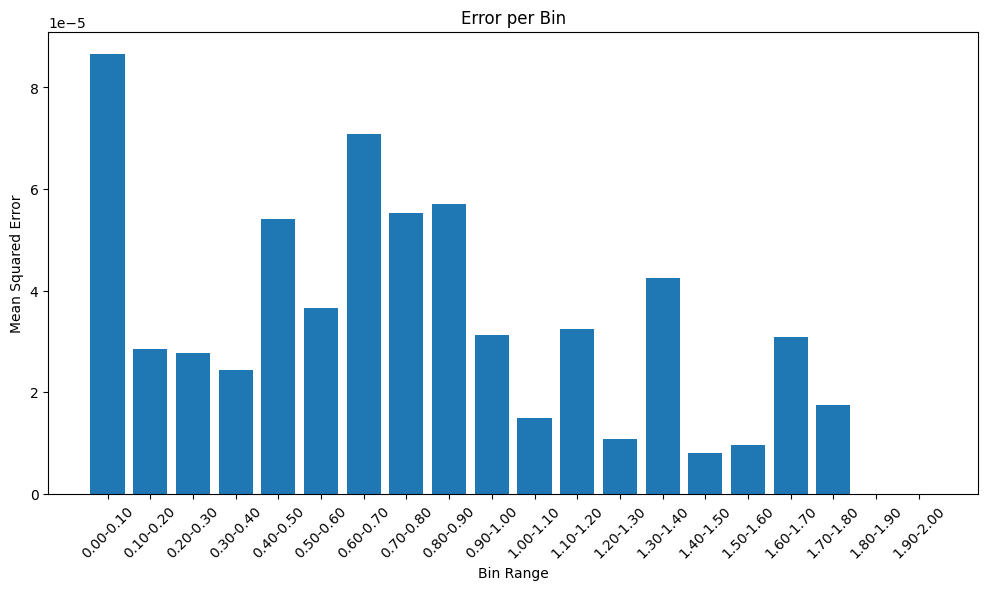

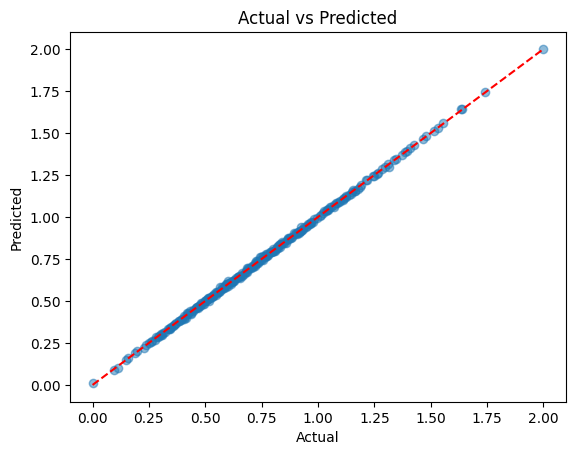

Sample with y = 0.4054734241558312 belongs to bin 5 and has an error of 0.01563642736208426
Sample with y = 0.41532896188838675 belongs to bin 5 and has an error of 0.0178206684981127
Sample with y = 0.6021415718621169 belongs to bin 7 and has an error of 0.018158303874119652
Sample with y = 0.5155573683592245 belongs to bin 6 and has an error of 0.018680592140810193
Sample with y = 0.742739398096911 belongs to bin 8 and has an error of 0.019599955464490337
alpha value 0.8
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 179ms/step - loss: 0.1898 - val_loss: 0.0220
Epoch 2/400
47/47 [==============================] - 8s 178ms/step - loss: 0.1264 - val_loss: 0.0182
Epoch 3/400
47/47 [==============================] - 8s 172ms/step - loss: 0.1160 - val_loss: 0.0141
Epoch 4/400
47/47 [==============================] - 8s 180ms/step - loss: 0.0727 - val_loss: 0.0045
Epoch 5/400
47/47 [==============================] - 8s 177ms/st

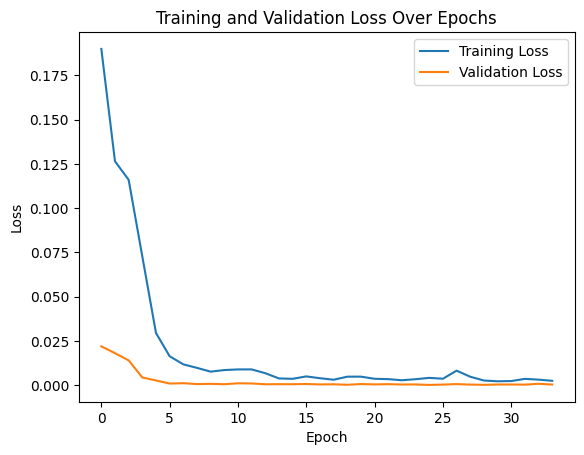

Epoch 1/25
63/63 [==============================] - 12s 164ms/step - loss: 0.0103
Epoch 2/25
63/63 [==============================] - 10s 157ms/step - loss: 0.0078
Epoch 3/25
63/63 [==============================] - 10s 157ms/step - loss: 0.0070
Epoch 4/25
63/63 [==============================] - 10s 165ms/step - loss: 0.0034
Epoch 5/25
63/63 [==============================] - 10s 164ms/step - loss: 0.0034
Epoch 6/25
63/63 [==============================] - 10s 160ms/step - loss: 0.0049
Epoch 7/25
63/63 [==============================] - 10s 161ms/step - loss: 0.0050
Epoch 8/25
63/63 [==============================] - 10s 160ms/step - loss: 0.0054
Epoch 9/25
63/63 [==============================] - 10s 160ms/step - loss: 0.0045
Epoch 10/25
63/63 [==============================] - 10s 157ms/step - loss: 0.0041
Epoch 11/25
63/63 [==============================] - 10s 158ms/step - loss: 0.0039
Epoch 12/25
63/63 [==============================] - 12s 184ms/step - loss: 0.0036
Epoch 13/25
6

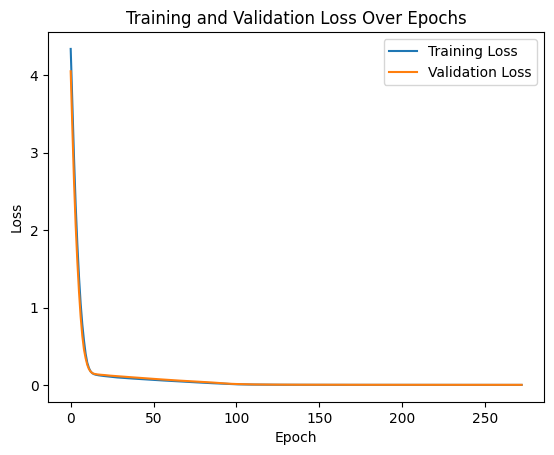

Epoch 1/264
63/63 [==============================] - 0s 5ms/step - loss: 7.0787e-04 - regression_head_loss: 7.0787e-04
Epoch 2/264
63/63 [==============================] - 0s 6ms/step - loss: 6.6851e-04 - regression_head_loss: 6.6851e-04
Epoch 3/264
63/63 [==============================] - 0s 7ms/step - loss: 6.4529e-04 - regression_head_loss: 6.4529e-04
Epoch 4/264
63/63 [==============================] - 0s 6ms/step - loss: 6.3376e-04 - regression_head_loss: 6.3376e-04
Epoch 5/264
63/63 [==============================] - 0s 5ms/step - loss: 6.2427e-04 - regression_head_loss: 6.2427e-04
Epoch 6/264
63/63 [==============================] - 0s 5ms/step - loss: 7.2685e-04 - regression_head_loss: 7.2685e-04
Epoch 7/264
63/63 [==============================] - 0s 5ms/step - loss: 6.2663e-04 - regression_head_loss: 6.2663e-04
Epoch 8/264
63/63 [==============================] - 0s 5ms/step - loss: 6.2833e-04 - regression_head_loss: 6.2833e-04
Epoch 9/264
63/63 [=============================

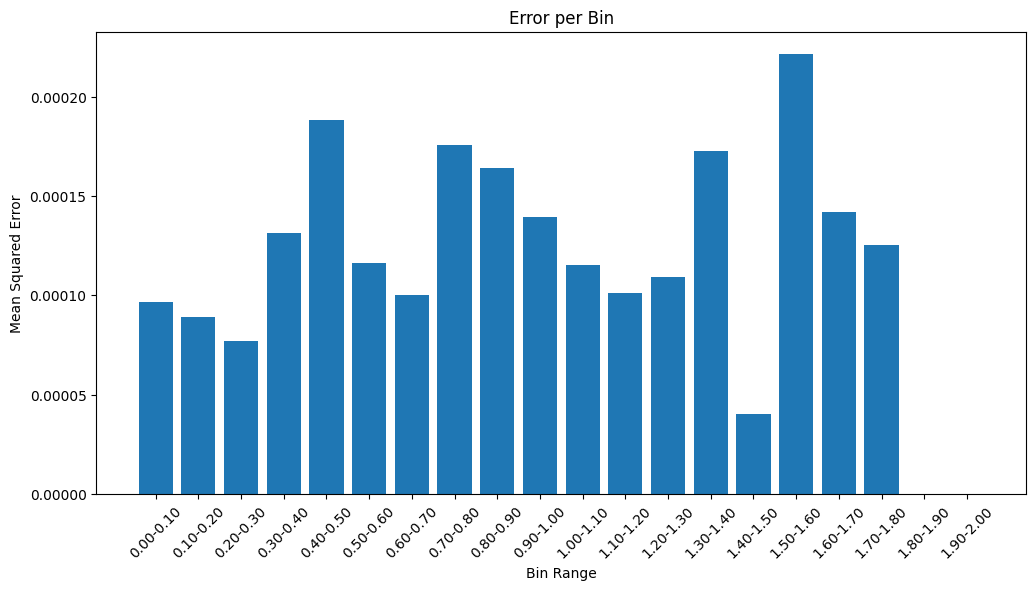

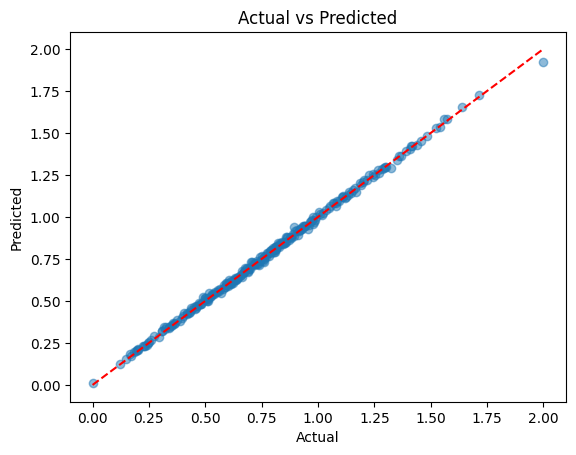

Sample with y = 0.703662478714064 belongs to bin 8 and has an error of 0.029972589225694346
Sample with y = 0.515295261639537 belongs to bin 6 and has an error of 0.03343749592882239
Sample with y = 0.4887253510224859 belongs to bin 5 and has an error of 0.03437550194382272
Sample with y = 0.8941007485235098 belongs to bin 9 and has an error of 0.043407774940693034
Sample with y = 2.0 belongs to bin 21 and has an error of 0.08055758476257324
alpha value 0.9
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 11s 188ms/step - loss: 2.0944 - val_loss: 0.0154
Epoch 2/400
47/47 [==============================] - 8s 177ms/step - loss: 0.0948 - val_loss: 0.0096
Epoch 3/400
47/47 [==============================] - 8s 180ms/step - loss: 0.1006 - val_loss: 0.0055
Epoch 4/400
47/47 [==============================] - 8s 180ms/step - loss: 0.0933 - val_loss: 0.0092
Epoch 5/400
47/47 [==============================] - 8s 181ms/step - loss: 0.096

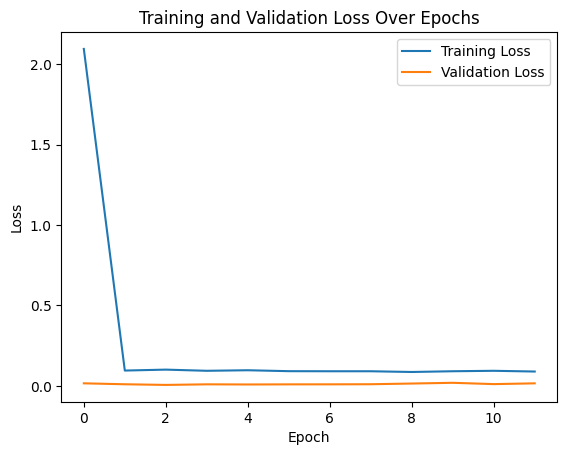

Epoch 1/3
63/63 [==============================] - 12s 170ms/step - loss: 0.0884
Epoch 2/3
63/63 [==============================] - 11s 167ms/step - loss: 0.0865
Epoch 3/3
63/63 [==============================] - 10s 162ms/step - loss: 0.0860
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 0.2212 - regression_head_loss: 0.2212 - val_loss: 0.2050 - val_regression_head_loss: 0.2050
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.2075 - regression_head_loss: 0.2075 - val_loss: 0.1975 - val_regression_head_loss: 0.1975
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.2000 - regression_head_loss: 0.2000 - val_loss: 0.1914 - val_regression_head_loss: 0.1914
Epoch 4/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1939 - regression_head_loss: 0.1939 - val_loss: 0.1851 - val_regression_head_loss: 0.1851
Epoch 5/400
47/47 [========================

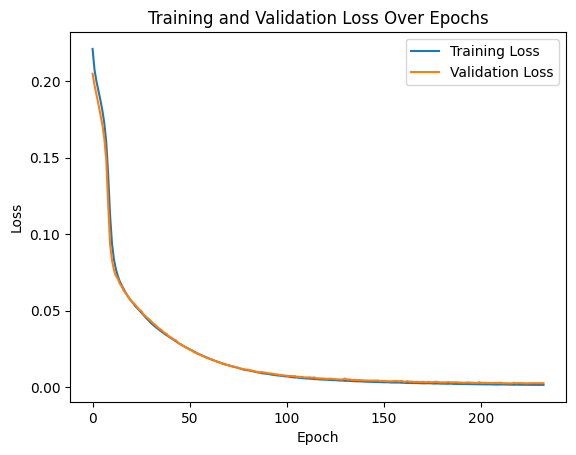

Epoch 1/224
63/63 [==============================] - 0s 5ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 2/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 3/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 4/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 5/224
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 6/224
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 7/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 8/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - regression_head_loss: 0.0015    
Epoch 9/224
63/63 [==============================] - 0s 5ms/step - loss: 0.0015 - regression_head_loss: 0.00

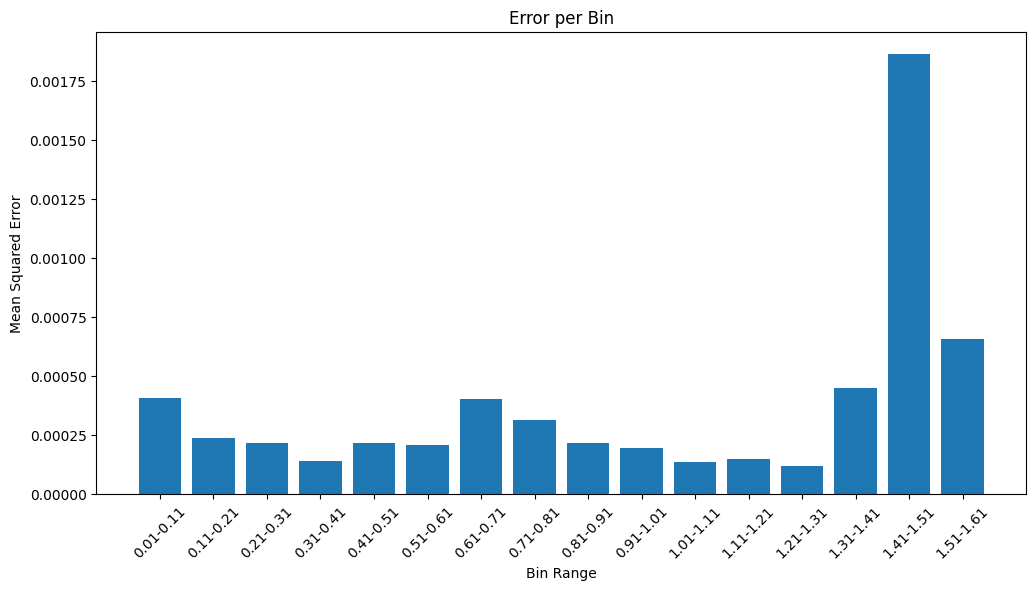

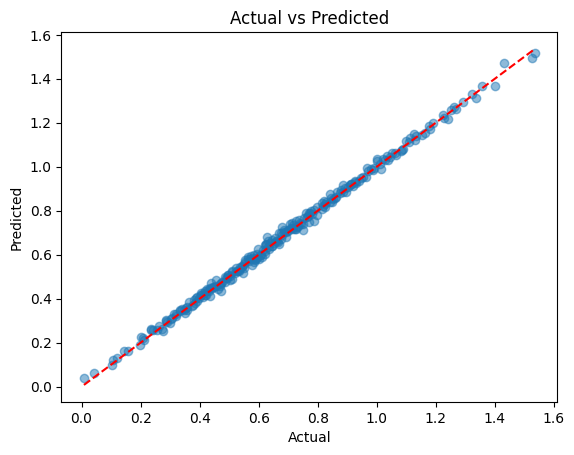

Sample with y = 0.7503391545207704 belongs to bin 8 and has an error of 0.036292676249286004
Sample with y = 0.4737538415417518 belongs to bin 5 and has an error of 0.036365212820514636
Sample with y = 1.4295843061729525 belongs to bin 15 and has an error of 0.043196636743917605
Sample with y = 0.6805137663419473 belongs to bin 7 and has an error of 0.04464301771566992
Sample with y = 0.629989427878505 belongs to bin 7 and has an error of 0.05061359946524502
alpha value 1.0
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 11s 193ms/step - loss: 0.5445 - val_loss: 0.0058
Epoch 2/400
47/47 [==============================] - 9s 187ms/step - loss: 0.1162 - val_loss: 0.0131
Epoch 3/400
47/47 [==============================] - 9s 195ms/step - loss: 0.1251 - val_loss: 0.0230
Epoch 4/400
47/47 [==============================] - 9s 191ms/step - loss: 0.1119 - val_loss: 0.0196
Epoch 5/400
47/47 [==============================] - 8s 180ms/s

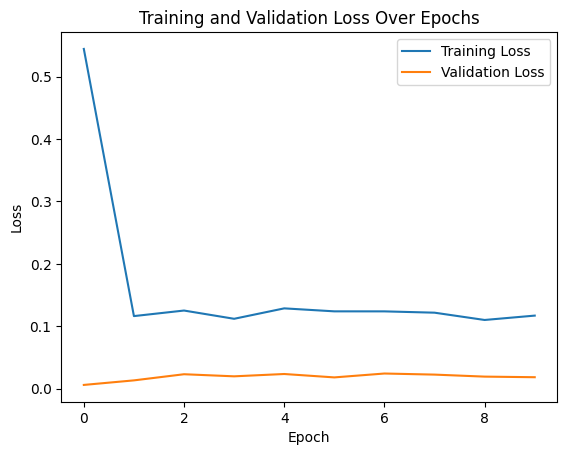

63/63 [==============================] - 13s 173ms/step - loss: 0.1282
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 3.1589 - regression_head_loss: 3.1589 - val_loss: 3.0255 - val_regression_head_loss: 3.0255
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 2.8497 - regression_head_loss: 2.8497 - val_loss: 2.4850 - val_regression_head_loss: 2.4850
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 2.2389 - regression_head_loss: 2.2389 - val_loss: 1.9635 - val_regression_head_loss: 1.9635
Epoch 4/400
47/47 [==============================] - 0s 10ms/step - loss: 1.7333 - regression_head_loss: 1.7333 - val_loss: 1.3935 - val_regression_head_loss: 1.3935
Epoch 5/400
47/47 [==============================] - 0s 8ms/step - loss: 1.2196 - regression_head_loss: 1.2196 - val_loss: 0.9098 - val_regression_head_loss: 0.9098
Epoch 6/400
47/47 [==============================

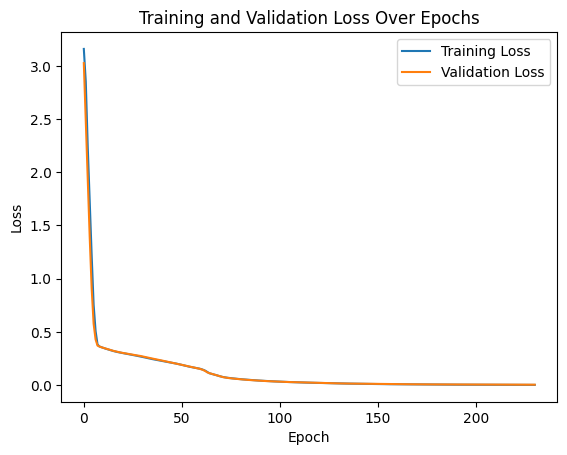

Epoch 1/222
63/63 [==============================] - 0s 7ms/step - loss: 0.0030 - regression_head_loss: 0.0030
Epoch 2/222
63/63 [==============================] - 0s 7ms/step - loss: 0.0028 - regression_head_loss: 0.0028
Epoch 3/222
63/63 [==============================] - 0s 6ms/step - loss: 0.0028 - regression_head_loss: 0.0028
Epoch 4/222
63/63 [==============================] - 0s 6ms/step - loss: 0.0025 - regression_head_loss: 0.0025
Epoch 5/222
63/63 [==============================] - 0s 6ms/step - loss: 0.0025 - regression_head_loss: 0.0025
Epoch 6/222
63/63 [==============================] - 0s 6ms/step - loss: 0.0023 - regression_head_loss: 0.0023
Epoch 7/222
63/63 [==============================] - 0s 6ms/step - loss: 0.0022 - regression_head_loss: 0.0022
Epoch 8/222
63/63 [==============================] - 0s 7ms/step - loss: 0.0023 - regression_head_loss: 0.0023
Epoch 9/222
63/63 [==============================] - 0s 6ms/step - loss: 0.0021 - regression_head_loss: 0.0021
E

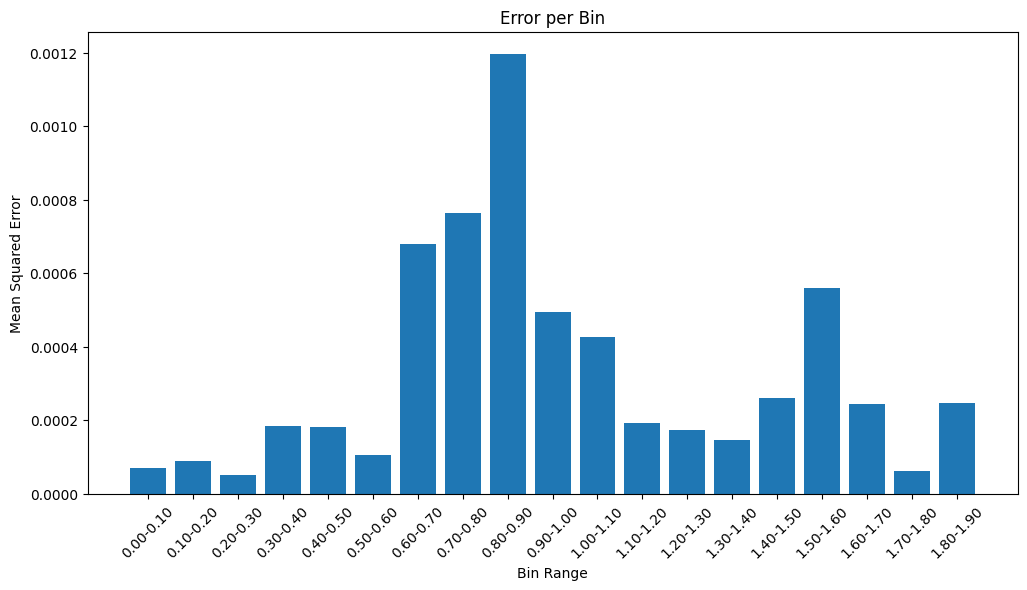

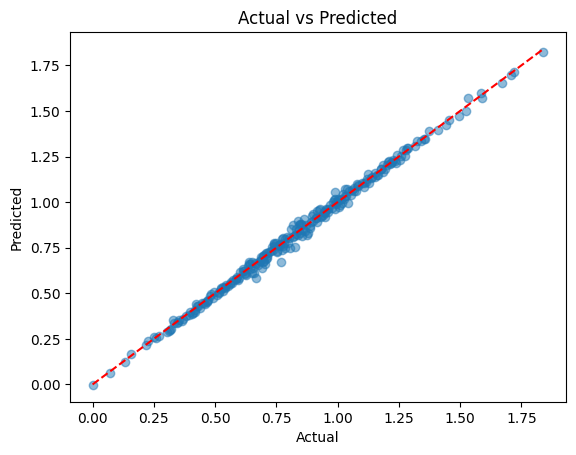

Sample with y = 0.836330556998607 belongs to bin 9 and has an error of 0.05931613432371963
Sample with y = 0.9882790634281272 belongs to bin 10 and has an error of 0.06598178652457054
Sample with y = 0.8251794705559597 belongs to bin 9 and has an error of 0.07385803558128934
Sample with y = 0.6649356433423597 belongs to bin 7 and has an error of 0.08088510718665898
Sample with y = 0.7683864043963377 belongs to bin 8 and has an error of 0.09780196416501441
alpha value 1.1
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 12s 208ms/step - loss: 0.9935 - val_loss: 0.0150
Epoch 2/400
47/47 [==============================] - 9s 192ms/step - loss: 0.1496 - val_loss: 0.0303
Epoch 3/400
47/47 [==============================] - 9s 196ms/step - loss: 0.1558 - val_loss: 0.0288
Epoch 4/400
47/47 [==============================] - 9s 200ms/step - loss: 0.1402 - val_loss: 0.0321
Epoch 5/400
47/47 [==============================] - 9s 194ms/step

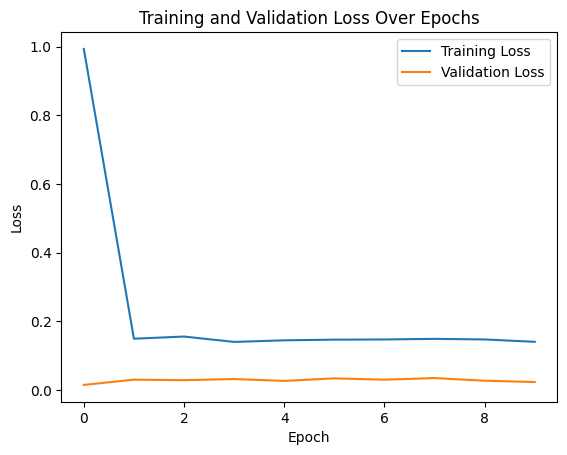

63/63 [==============================] - 12s 168ms/step - loss: 0.1439
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 1.0361 - regression_head_loss: 1.0361 - val_loss: 1.0140 - val_regression_head_loss: 1.0140
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 1.0144 - regression_head_loss: 1.0144 - val_loss: 0.9946 - val_regression_head_loss: 0.9946
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.9961 - regression_head_loss: 0.9961 - val_loss: 0.9768 - val_regression_head_loss: 0.9768
Epoch 4/400
47/47 [==============================] - 0s 10ms/step - loss: 0.9793 - regression_head_loss: 0.9793 - val_loss: 0.9601 - val_regression_head_loss: 0.9601
Epoch 5/400
47/47 [==============================] - 0s 10ms/step - loss: 0.9631 - regression_head_loss: 0.9631 - val_loss: 0.9448 - val_regression_head_loss: 0.9448
Epoch 6/400
47/47 [=============================

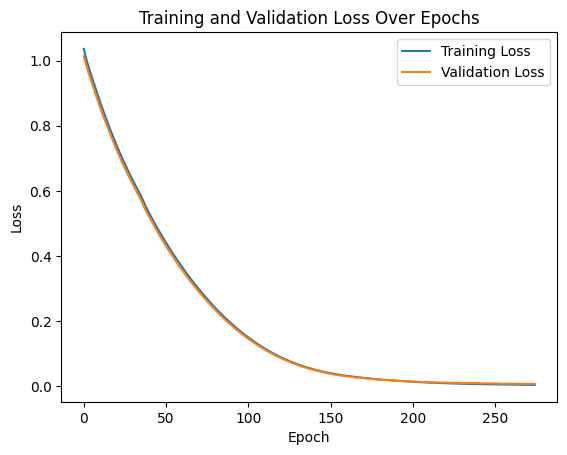

Epoch 1/266
63/63 [==============================] - 0s 7ms/step - loss: 0.0047 - regression_head_loss: 0.0047
Epoch 2/266
63/63 [==============================] - 0s 7ms/step - loss: 0.0044 - regression_head_loss: 0.0044
Epoch 3/266
63/63 [==============================] - 0s 6ms/step - loss: 0.0042 - regression_head_loss: 0.0042
Epoch 4/266
63/63 [==============================] - 0s 7ms/step - loss: 0.0041 - regression_head_loss: 0.0041
Epoch 5/266
63/63 [==============================] - 0s 6ms/step - loss: 0.0040 - regression_head_loss: 0.0040
Epoch 6/266
63/63 [==============================] - 0s 7ms/step - loss: 0.0038 - regression_head_loss: 0.0038
Epoch 7/266
63/63 [==============================] - 0s 7ms/step - loss: 0.0039 - regression_head_loss: 0.0039
Epoch 8/266
63/63 [==============================] - 0s 6ms/step - loss: 0.0040 - regression_head_loss: 0.0040
Epoch 9/266
63/63 [==============================] - 0s 7ms/step - loss: 0.0037 - regression_head_loss: 0.0037
E

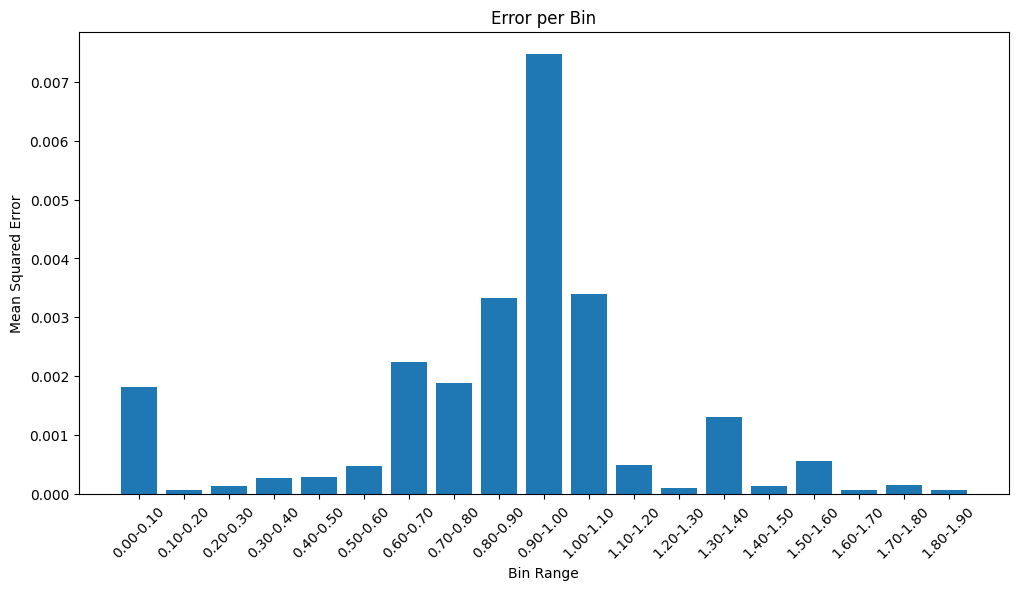

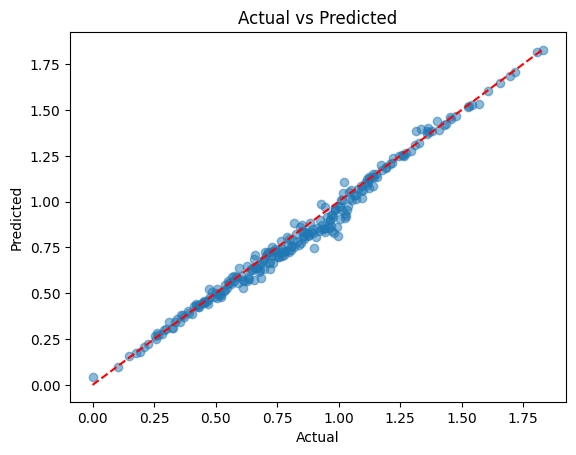

Sample with y = 0.995370587336067 belongs to bin 10 and has an error of 0.131508966909889
Sample with y = 0.9740176237384334 belongs to bin 10 and has an error of 0.13683289654650832
Sample with y = 0.9802430405464884 belongs to bin 10 and has an error of 0.14865375898749789
Sample with y = 0.8986498112693985 belongs to bin 9 and has an error of 0.15199160528337552
Sample with y = 0.9966919239497429 belongs to bin 10 and has an error of 0.18489084801437916
alpha value 1.2000000000000002
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 182ms/step - loss: 1.0248 - val_loss: 0.0081
Epoch 2/400
47/47 [==============================] - 8s 179ms/step - loss: 0.0630 - val_loss: 0.0069
Epoch 3/400
47/47 [==============================] - 10s 208ms/step - loss: 0.0614 - val_loss: 0.0069
Epoch 4/400
47/47 [==============================] - 10s 202ms/step - loss: 0.0631 - val_loss: 0.0071
Epoch 5/400
47/47 [=============================

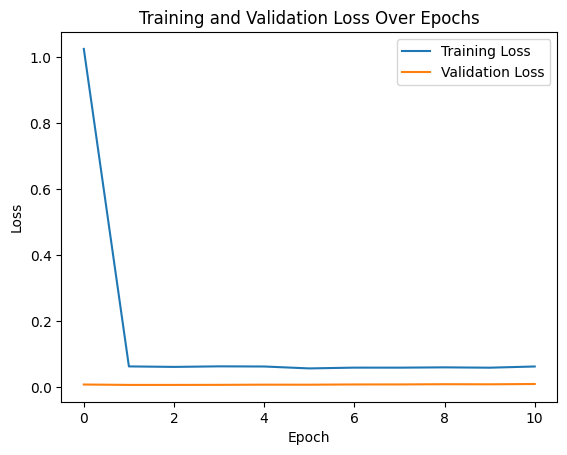

Epoch 1/2
63/63 [==============================] - 12s 166ms/step - loss: 0.0645
Epoch 2/2
63/63 [==============================] - 10s 166ms/step - loss: 0.0480
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 2.0856 - regression_head_loss: 2.0856 - val_loss: 1.9239 - val_regression_head_loss: 1.9239
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 1.7740 - regression_head_loss: 1.7740 - val_loss: 1.5956 - val_regression_head_loss: 1.5956
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 1.4404 - regression_head_loss: 1.4404 - val_loss: 1.2770 - val_regression_head_loss: 1.2770
Epoch 4/400
47/47 [==============================] - 0s 8ms/step - loss: 1.0792 - regression_head_loss: 1.0792 - val_loss: 0.9399 - val_regression_head_loss: 0.9399
Epoch 5/400
47/47 [==============================] - 0s 8ms/step - loss: 0.7073 - regression_head_loss: 0.7073 - val_loss: 0

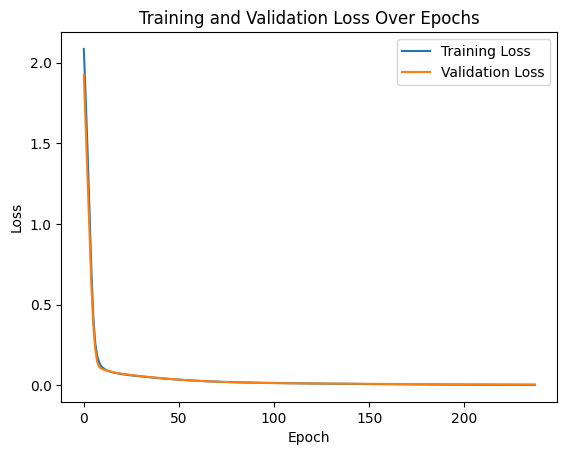

Epoch 1/229
63/63 [==============================] - 0s 7ms/step - loss: 0.0041 - regression_head_loss: 0.0041
Epoch 2/229
63/63 [==============================] - 0s 6ms/step - loss: 0.0038 - regression_head_loss: 0.0038
Epoch 3/229
63/63 [==============================] - 0s 7ms/step - loss: 0.0040 - regression_head_loss: 0.0040
Epoch 4/229
63/63 [==============================] - 0s 6ms/step - loss: 0.0037 - regression_head_loss: 0.0037
Epoch 5/229
63/63 [==============================] - 0s 7ms/step - loss: 0.0036 - regression_head_loss: 0.0036
Epoch 6/229
63/63 [==============================] - 0s 7ms/step - loss: 0.0035 - regression_head_loss: 0.0035
Epoch 7/229
63/63 [==============================] - 0s 6ms/step - loss: 0.0034 - regression_head_loss: 0.0034
Epoch 8/229
63/63 [==============================] - 0s 7ms/step - loss: 0.0033 - regression_head_loss: 0.0033
Epoch 9/229
63/63 [==============================] - 0s 8ms/step - loss: 0.0033 - regression_head_loss: 0.0033
E

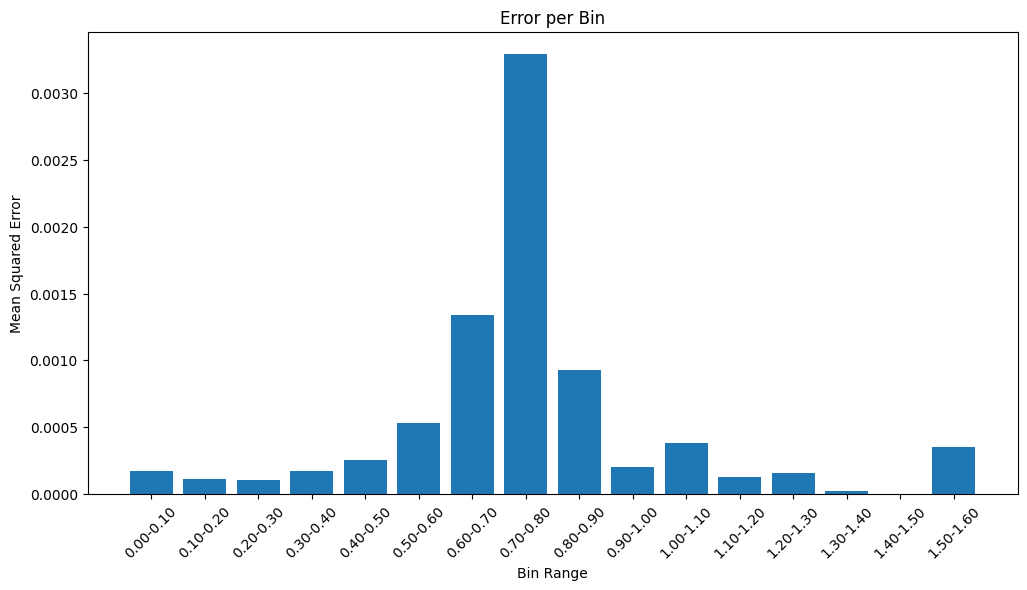

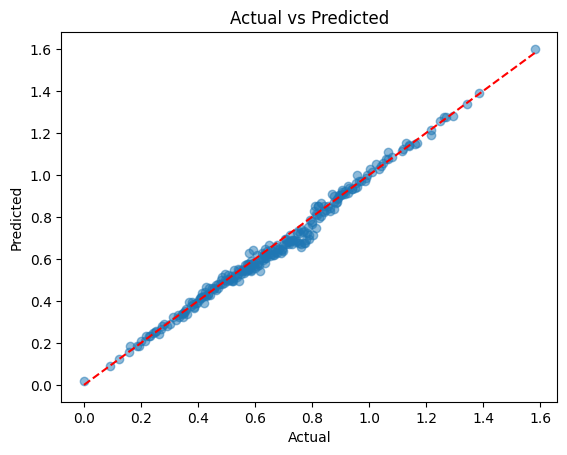

Sample with y = 0.7620579844704874 belongs to bin 8 and has an error of 0.09080066740429482
Sample with y = 0.7710532954130759 belongs to bin 8 and has an error of 0.09374211339098115
Sample with y = 0.790302887801846 belongs to bin 8 and has an error of 0.09398306930514189
Sample with y = 0.7762166635919482 belongs to bin 8 and has an error of 0.10088936256655756
Sample with y = 0.7603564718745954 belongs to bin 8 and has an error of 0.10529606137502268
alpha value 1.3
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 182ms/step - loss: 0.5156 - val_loss: 0.0036
Epoch 2/400
47/47 [==============================] - 9s 185ms/step - loss: 0.0900 - val_loss: 0.0060
Epoch 3/400
47/47 [==============================] - 9s 194ms/step - loss: 0.0788 - val_loss: 0.0096
Epoch 4/400
47/47 [==============================] - 9s 198ms/step - loss: 0.0822 - val_loss: 0.0079
Epoch 5/400
47/47 [==============================] - 10s 203ms/step

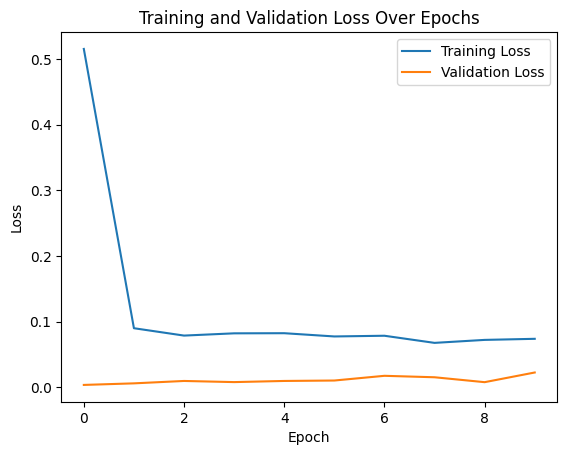

63/63 [==============================] - 14s 189ms/step - loss: 0.0828
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 17ms/step - loss: 4.9121 - regression_head_loss: 4.9121 - val_loss: 4.7250 - val_regression_head_loss: 4.7250
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 4.5442 - regression_head_loss: 4.5442 - val_loss: 4.3445 - val_regression_head_loss: 4.3445
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 3.9252 - regression_head_loss: 3.9252 - val_loss: 3.9267 - val_regression_head_loss: 3.9267
Epoch 4/400
47/47 [==============================] - 0s 9ms/step - loss: 3.3935 - regression_head_loss: 3.3935 - val_loss: 3.4043 - val_regression_head_loss: 3.4043
Epoch 5/400
47/47 [==============================] - 0s 9ms/step - loss: 2.8265 - regression_head_loss: 2.8265 - val_loss: 2.7133 - val_regression_head_loss: 2.7133
Epoch 6/400
47/47 [==============================]

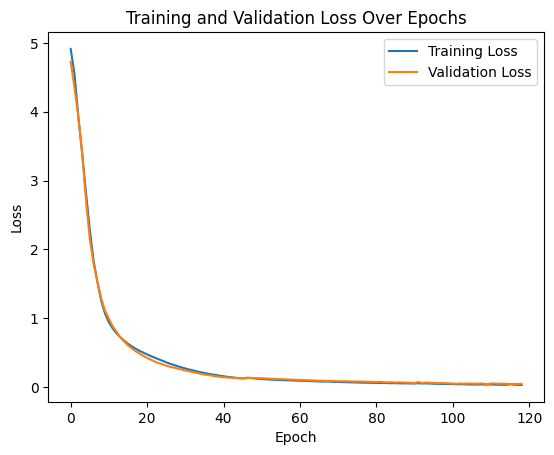

Epoch 1/110
63/63 [==============================] - 1s 7ms/step - loss: 0.0461 - regression_head_loss: 0.0461
Epoch 2/110
63/63 [==============================] - 0s 6ms/step - loss: 0.0430 - regression_head_loss: 0.0430
Epoch 3/110
63/63 [==============================] - 0s 6ms/step - loss: 0.0406 - regression_head_loss: 0.0406
Epoch 4/110
63/63 [==============================] - 0s 7ms/step - loss: 0.0377 - regression_head_loss: 0.0377
Epoch 5/110
63/63 [==============================] - 0s 7ms/step - loss: 0.0365 - regression_head_loss: 0.0365
Epoch 6/110
63/63 [==============================] - 0s 7ms/step - loss: 0.0357 - regression_head_loss: 0.0357
Epoch 7/110
63/63 [==============================] - 0s 7ms/step - loss: 0.0344 - regression_head_loss: 0.0344
Epoch 8/110
63/63 [==============================] - 1s 8ms/step - loss: 0.0343 - regression_head_loss: 0.0343
Epoch 9/110
63/63 [==============================] - 0s 7ms/step - loss: 0.0349 - regression_head_loss: 0.0349
E

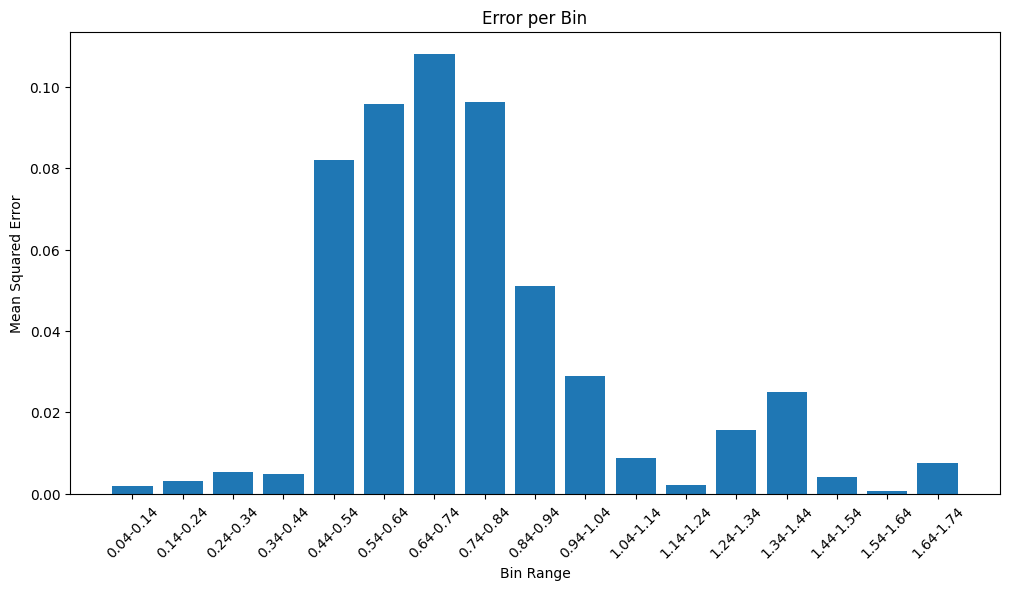

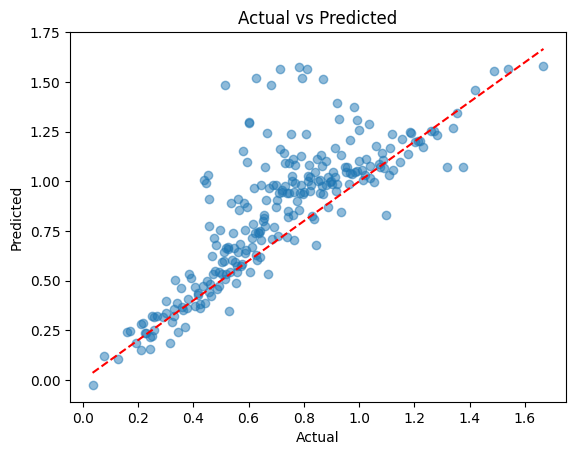

Sample with y = 0.7824076282753392 belongs to bin 8 and has an error of 0.7925444972739772
Sample with y = 0.6812980764866452 belongs to bin 7 and has an error of 0.8040378695964236
Sample with y = 0.7138575470721228 belongs to bin 7 and has an error of 0.8540417992795007
Sample with y = 0.6279009512835905 belongs to bin 6 and has an error of 0.892792231661661
Sample with y = 0.5152090691464577 belongs to bin 5 and has an error of 0.9692760802370872
alpha value 1.4000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 12s 205ms/step - loss: 0.4666 - val_loss: 0.0127
Epoch 2/400
47/47 [==============================] - 9s 191ms/step - loss: 0.1452 - val_loss: 0.0179
Epoch 3/400
47/47 [==============================] - 9s 192ms/step - loss: 0.1430 - val_loss: 0.0211
Epoch 4/400
47/47 [==============================] - 9s 189ms/step - loss: 0.1475 - val_loss: 0.0267
Epoch 5/400
47/47 [==============================] - 9s 1

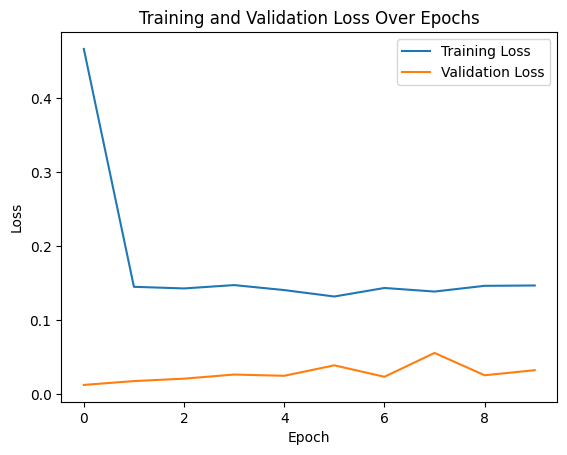

63/63 [==============================] - 14s 177ms/step - loss: 0.1444
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 15ms/step - loss: 4.9755 - regression_head_loss: 4.9755 - val_loss: 4.7116 - val_regression_head_loss: 4.7116
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 4.5485 - regression_head_loss: 4.5485 - val_loss: 4.2143 - val_regression_head_loss: 4.2143
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 3.7088 - regression_head_loss: 3.7088 - val_loss: 3.6649 - val_regression_head_loss: 3.6649
Epoch 4/400
47/47 [==============================] - 0s 9ms/step - loss: 3.0651 - regression_head_loss: 3.0651 - val_loss: 3.2589 - val_regression_head_loss: 3.2589
Epoch 5/400
47/47 [==============================] - 0s 9ms/step - loss: 2.6625 - regression_head_loss: 2.6625 - val_loss: 2.8524 - val_regression_head_loss: 2.8524
Epoch 6/400
47/47 [==============================]

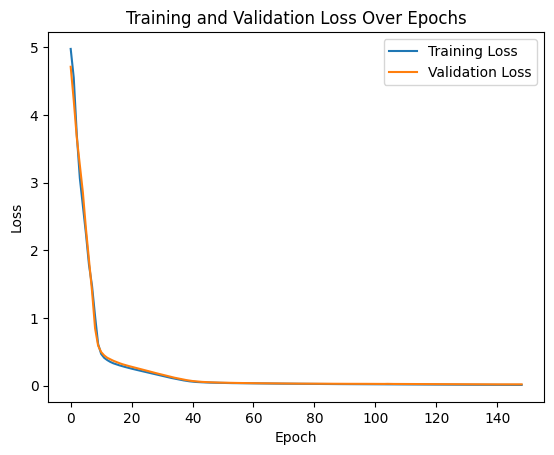

Epoch 1/140
63/63 [==============================] - 0s 6ms/step - loss: 0.0117 - regression_head_loss: 0.0117
Epoch 2/140
63/63 [==============================] - 0s 7ms/step - loss: 0.0109 - regression_head_loss: 0.0109
Epoch 3/140
63/63 [==============================] - 0s 6ms/step - loss: 0.0105 - regression_head_loss: 0.0105
Epoch 4/140
63/63 [==============================] - 0s 7ms/step - loss: 0.0101 - regression_head_loss: 0.0101
Epoch 5/140
63/63 [==============================] - 0s 7ms/step - loss: 0.0101 - regression_head_loss: 0.0101
Epoch 6/140
63/63 [==============================] - 0s 6ms/step - loss: 0.0096 - regression_head_loss: 0.0096
Epoch 7/140
63/63 [==============================] - 0s 8ms/step - loss: 0.0099 - regression_head_loss: 0.0099
Epoch 8/140
63/63 [==============================] - 1s 8ms/step - loss: 0.0091 - regression_head_loss: 0.0091
Epoch 9/140
63/63 [==============================] - 0s 7ms/step - loss: 0.0090 - regression_head_loss: 0.0090
E

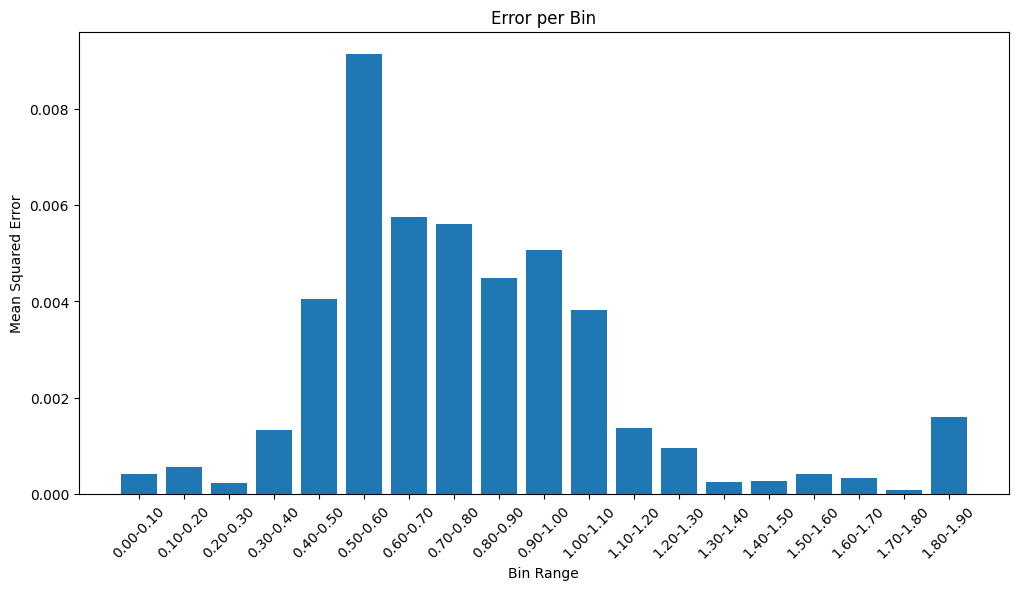

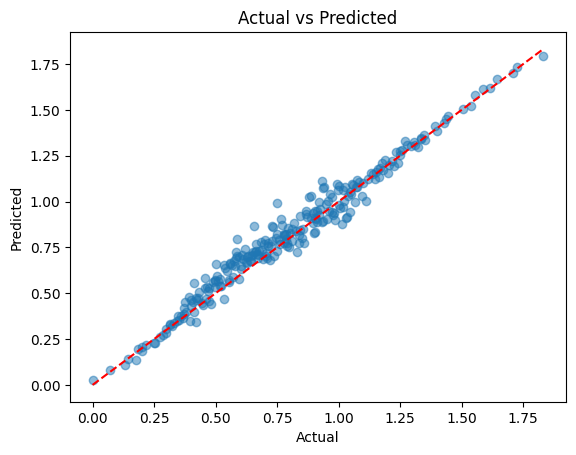

Sample with y = 0.5009770581525239 belongs to bin 6 and has an error of 0.16125492360177907
Sample with y = 0.9307945595172573 belongs to bin 10 and has an error of 0.17945722480738868
Sample with y = 0.5886416818817253 belongs to bin 6 and has an error of 0.20951857307356647
Sample with y = 0.6543169121267901 belongs to bin 7 and has an error of 0.2121826906678571
Sample with y = 0.7507442706813963 belongs to bin 8 and has an error of 0.24119038641546653
alpha value 1.5
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 11s 192ms/step - loss: 0.3014 - val_loss: 0.0086
Epoch 2/400
47/47 [==============================] - 8s 170ms/step - loss: 0.1532 - val_loss: 0.0230
Epoch 3/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1515 - val_loss: 0.0250
Epoch 4/400
47/47 [==============================] - 8s 167ms/step - loss: 0.1377 - val_loss: 0.0255
Epoch 5/400
47/47 [==============================] - 8s 168ms/step

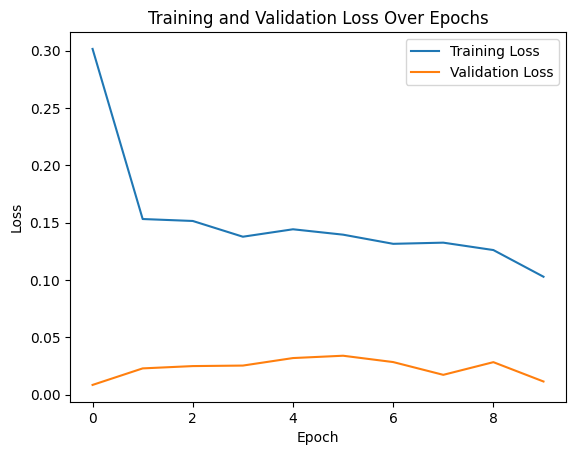

63/63 [==============================] - 11s 157ms/step - loss: 0.1552
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 15ms/step - loss: 0.5189 - regression_head_loss: 0.5189 - val_loss: 0.5025 - val_regression_head_loss: 0.5025
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 0.4377 - regression_head_loss: 0.4377 - val_loss: 0.4472 - val_regression_head_loss: 0.4472
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3652 - regression_head_loss: 0.3652 - val_loss: 0.3777 - val_regression_head_loss: 0.3777
Epoch 4/400
47/47 [==============================] - 0s 9ms/step - loss: 0.2918 - regression_head_loss: 0.2918 - val_loss: 0.3184 - val_regression_head_loss: 0.3184
Epoch 5/400
47/47 [==============================] - 1s 11ms/step - loss: 0.2290 - regression_head_loss: 0.2290 - val_loss: 0.2727 - val_regression_head_loss: 0.2727
Epoch 6/400
47/47 [==============================

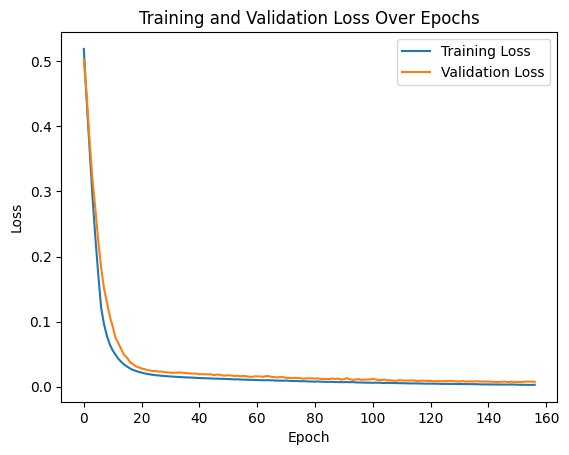

Epoch 1/148
63/63 [==============================] - 0s 7ms/step - loss: 0.0048 - regression_head_loss: 0.0048
Epoch 2/148
63/63 [==============================] - 0s 7ms/step - loss: 0.0044 - regression_head_loss: 0.0044
Epoch 3/148
63/63 [==============================] - 0s 7ms/step - loss: 0.0041 - regression_head_loss: 0.0041
Epoch 4/148
63/63 [==============================] - 0s 7ms/step - loss: 0.0042 - regression_head_loss: 0.0042
Epoch 5/148
63/63 [==============================] - 0s 7ms/step - loss: 0.0039 - regression_head_loss: 0.0039
Epoch 6/148
63/63 [==============================] - 0s 6ms/step - loss: 0.0036 - regression_head_loss: 0.0036
Epoch 7/148
63/63 [==============================] - 0s 7ms/step - loss: 0.0037 - regression_head_loss: 0.0037
Epoch 8/148
63/63 [==============================] - 1s 8ms/step - loss: 0.0035 - regression_head_loss: 0.0035
Epoch 9/148
63/63 [==============================] - 1s 8ms/step - loss: 0.0033 - regression_head_loss: 0.0033
E

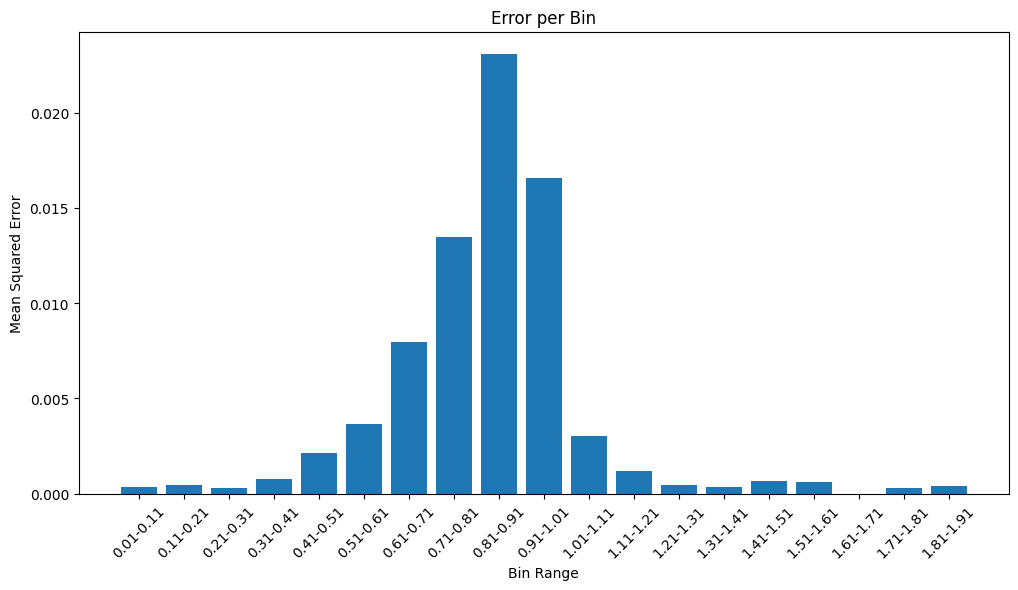

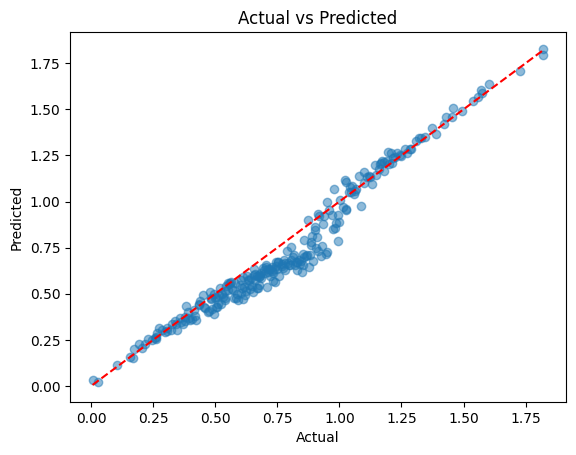

Sample with y = 0.9250998671678573 belongs to bin 10 and has an error of 0.21823080140629114
Sample with y = 0.9504906471463657 belongs to bin 10 and has an error of 0.2220233615132785
Sample with y = 0.8485250621971065 belongs to bin 9 and has an error of 0.22887988387908287
Sample with y = 0.8759381544248371 belongs to bin 9 and has an error of 0.22922102328698923
Sample with y = 0.9473214060990395 belongs to bin 10 and has an error of 0.23037450620813982
best alpha 0.7000000000000001, best error 4.1477713239146397e-05


In [7]:
# search alpha from 0 to 1.5 at .1 increments 
best_error, best_alpha = np.inf, 0
for alpha in np.arange(0, 1.6, 0.1):
    print(f'alpha value {alpha}')
    res = trial_run(alpha)
    if res < best_error:
        best_error = res
        best_alpha = alpha
        
print(f'best alpha {best_alpha}, best error {best_error}')
    

(1000,)
min_val y in before norm:  0.30336393039835013
max_val y in before norm:  4.602297725798119
(1000,)
min_val y in before norm:  0.2292676773559074
max_val y in before norm:  4.752819850356652


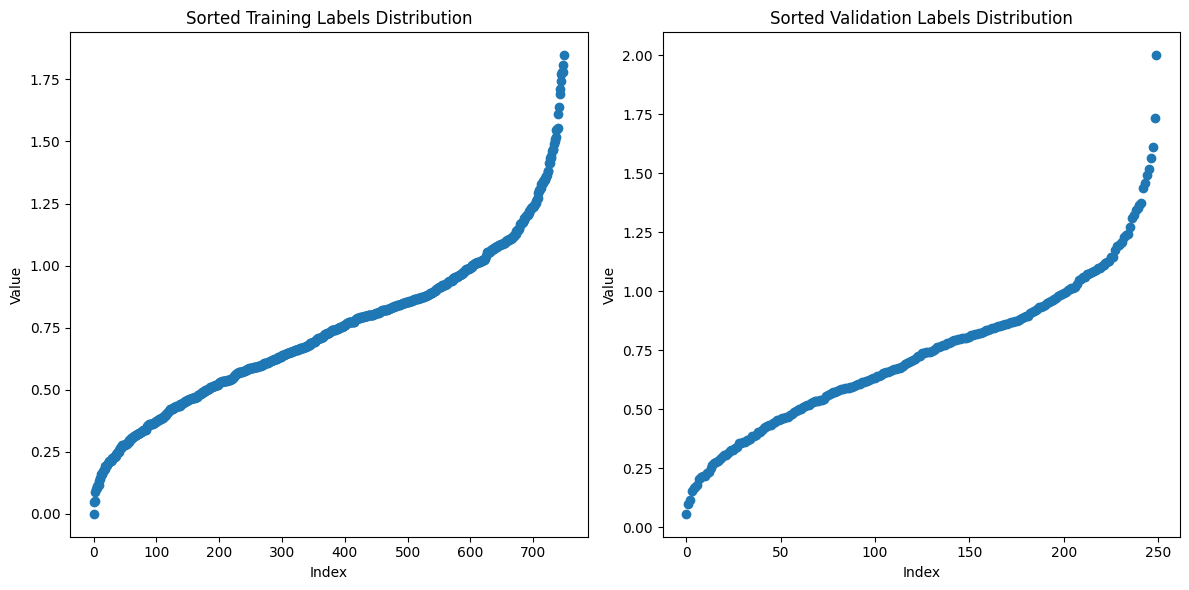

X_train:  [[-0.62246223  0.37896541  0.21532772 -2.16766725]
 [ 0.50407224 -1.44429391 -1.31738916  0.12623662]
 [-0.22978148  1.18858544  2.19576143  0.97595628]
 [-1.14883365  0.98882227 -0.71678588 -0.12967708]
 [-1.69861637 -0.93105842  0.02002657  1.48129898]
 [ 0.40211501  0.59275706 -0.50991036 -0.22049538]
 [ 0.44028985 -0.11207012 -0.1546883   0.28030167]
 [-0.37405381 -0.83444779  1.29430155 -1.35414339]
 [ 1.67955003  2.03392997  0.36869044  0.23041094]
 [-0.53239869  0.13008385  1.52273453 -1.05225906]
 [-2.58664602 -0.01454441 -0.37231966 -1.26076598]
 [ 1.38762586  1.3406884  -0.05532299 -0.61273053]]
Validation X: [[-0.89592699  3.11393197 -0.65646787  3.20170842]
 [ 0.66104885  2.40149081  1.95706127 -2.48936725]
 [-2.10163958 -2.47100594  1.90285098  0.12385374]
 [ 2.02124241 -0.60490302  2.90250703 -0.75928997]
 [-2.82907244  1.91014557  0.23055476 -1.01569873]
 [ 1.67124521  2.53629347 -0.51551679 -1.69204259]
 [-0.52082416  1.60424746  2.99078118 -0.18376957]
 [-1.3

In [3]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)
print(loader.min_y, loader.max_y)

Model Building

In [5]:
# NN for representation learning:
# 4 input nodes
# 1 or more hidden layers
# the last hidden layer has 2 nodes (representation layer Z)
# plot the instances in the 2D feature/representation space of Z 
# use different colors for different target values (can be in groups, each group with a different color) similar to the RankSim pictures
# training and test sets in different plots.
# expecting the instances to be in a semi-circle
# for prediction, add output layer of 1 node.

mb = mb()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0     

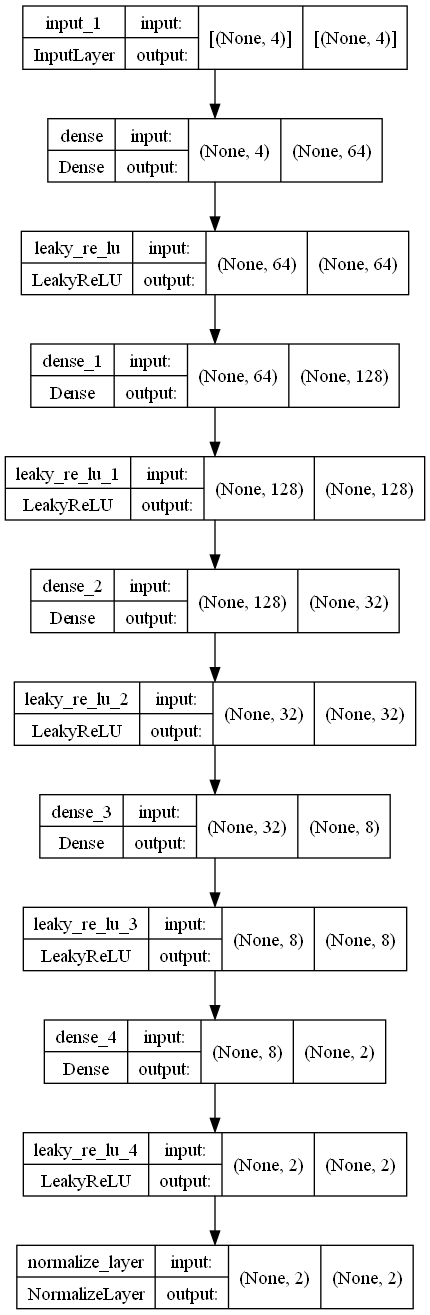

In [6]:
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_pds(4, 2, hiddens)
# summarize and plot the model
model.summary()

Test of First Idea improving on ranksim

In [7]:
eva = ev()

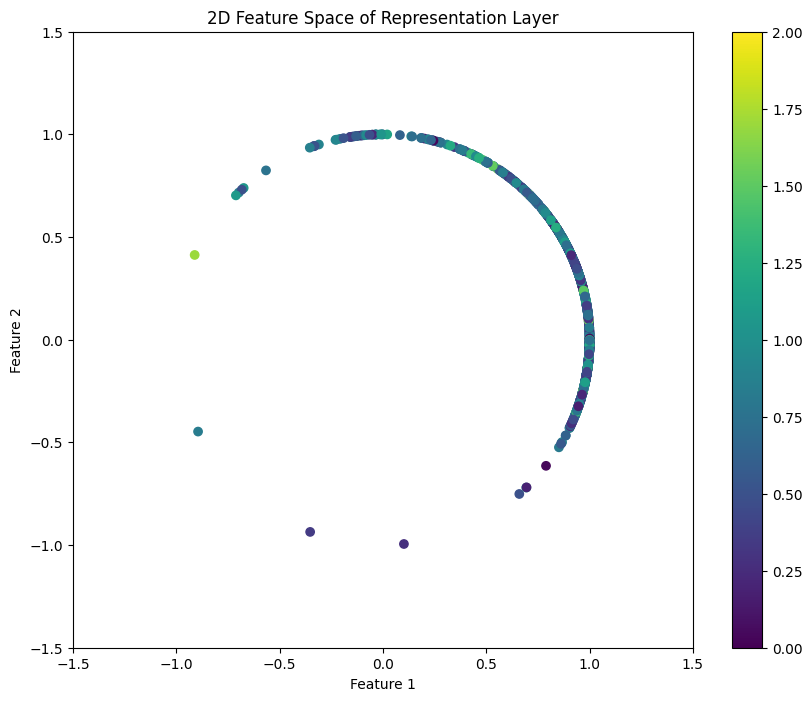

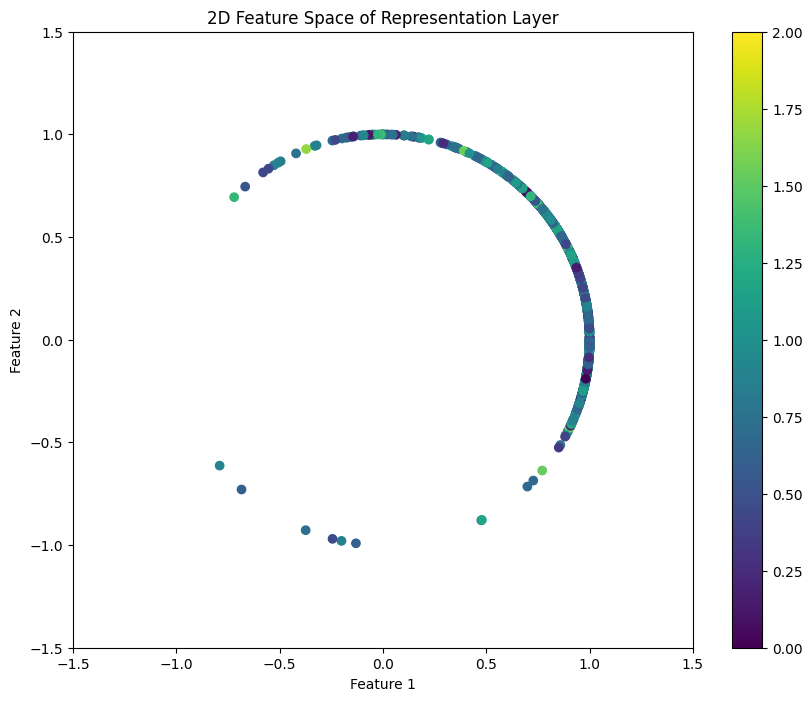

In [8]:
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 9s 183ms/step - loss: 0.1893 - val_loss: 0.1390
Epoch 2/400
44/44 [==============================] - 8s 177ms/step - loss: 0.1217 - val_loss: 0.1353
Epoch 3/400
44/44 [==============================] - 8s 173ms/step - loss: 0.1141 - val_loss: 0.1359
Epoch 4/400
44/44 [==============================] - 8s 174ms/step - loss: 0.1203 - val_loss: 0.1350
Epoch 5/400
44/44 [==============================] - 8s 171ms/step - loss: 0.1226 - val_loss: 0.1286
Epoch 6/400
44/44 [==============================] - 7s 163ms/step - loss: 0.1072 - val_loss: 0.1052
Epoch 7/400
44/44 [==============================] - 7s 170ms/step - loss: 0.0743 - val_loss: 0.0516
Epoch 8/400
44/44 [==============================] - 8s 174ms/step - loss: 0.0455 - val_loss: 0.0291
Epoch 9/400
44/44 [==============================] - 7s 163ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 10/400
44/44 [==================

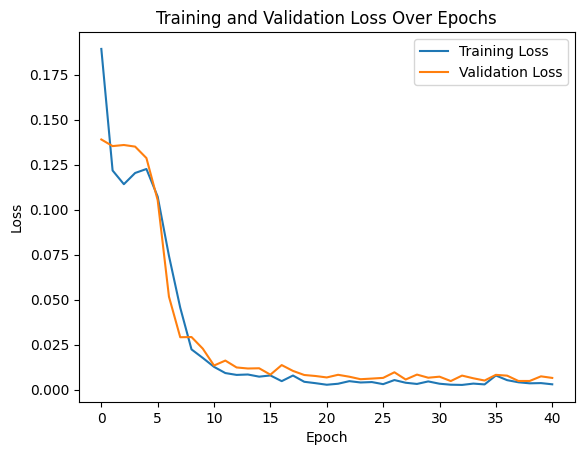

Epoch 1/32
63/63 [==============================] - 11s 149ms/step - loss: 0.0093
Epoch 2/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0078
Epoch 3/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0063
Epoch 4/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0049
Epoch 5/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0061
Epoch 6/32
63/63 [==============================] - 10s 151ms/step - loss: 0.0034
Epoch 7/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0066
Epoch 8/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0051
Epoch 9/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0041
Epoch 10/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0031
Epoch 11/32
63/63 [==============================] - 9s 150ms/step - loss: 0.0021
Epoch 12/32
63/63 [==============================] - 10s 153ms/step - loss: 0.0022
Epoch 13/32
63/63 [===

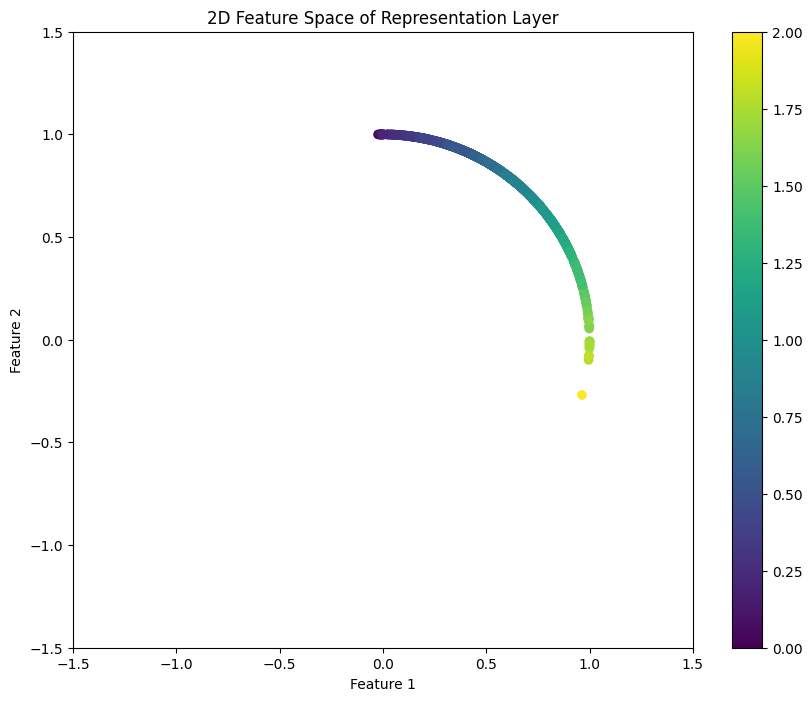

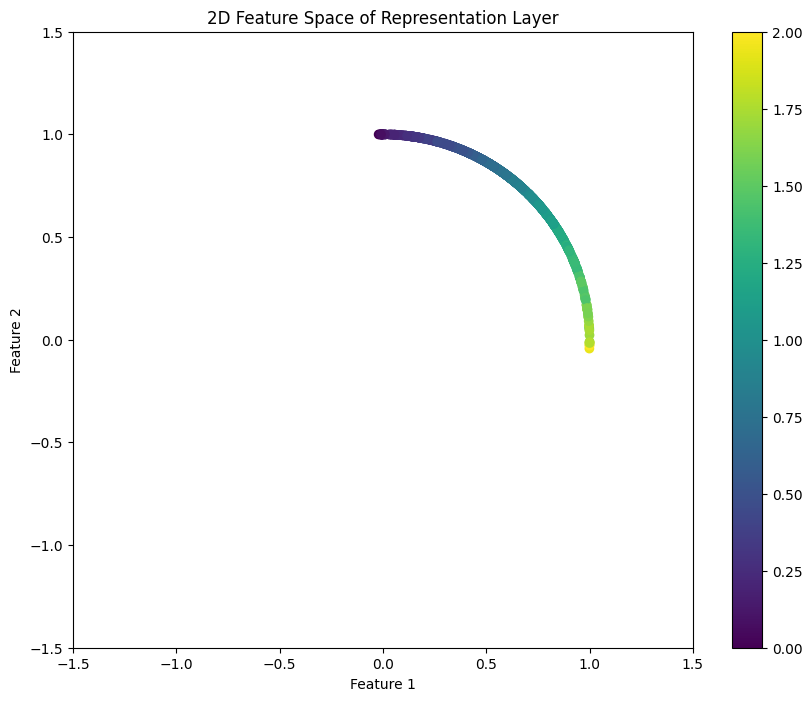

In [8]:
history = mb.train_pds(model, loader.X_train, loader.y_train, learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0   

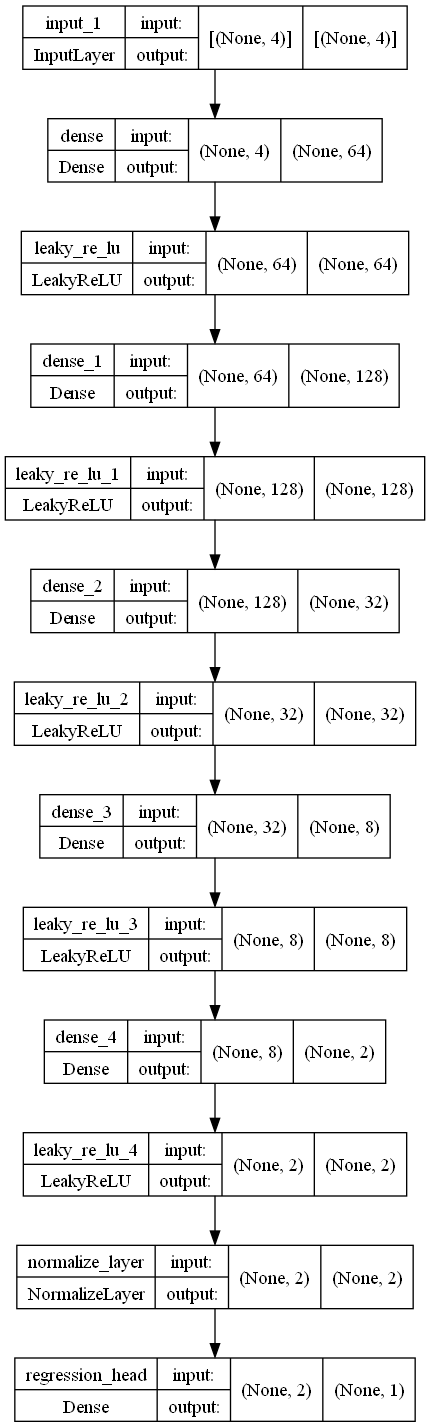

In [8]:
# add regression head
extended_model = mb.add_regression_head(model)
# summarize and plot the model
extended_model.summary()
# tf.keras.utils.plot_model(extended_model, show_shapes=True)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 2s 20ms/step - loss: 0.4602 - regression_head_loss: 0.4602 - regression_head_mse: 0.4884 - val_loss: 0.3065 - val_regression_head_loss: 0.3065 - val_regression_head_mse: 0.3115
Epoch 2/400
44/44 [==============================] - 1s 12ms/step - loss: 0.2095 - regression_head_loss: 0.2095 - regression_head_mse: 0.2062 - val_loss: 0.1420 - val_regression_head_loss: 0.1420 - val_regression_head_mse: 0.1251
Epoch 3/400
44/44 [==============================] - 1s 20ms/step - loss: 0.1007 - regression_head_loss: 0.1007 - regression_head_mse: 0.0839 - val_loss: 0.0773 - val_regression_head_loss: 0.0773 - val_regression_head_mse: 0.0550
Epoch 4/400
44/44 [==============================] - 1s 12ms/step - loss: 0.0561 - regression_head_loss: 0.0561 - regression_head_mse: 0.0377 - val_loss: 0.0469 - val_regression_head_loss: 0.0469 - val_regression_head_mse: 0.0268
Epoch 5/400
44/44 [========

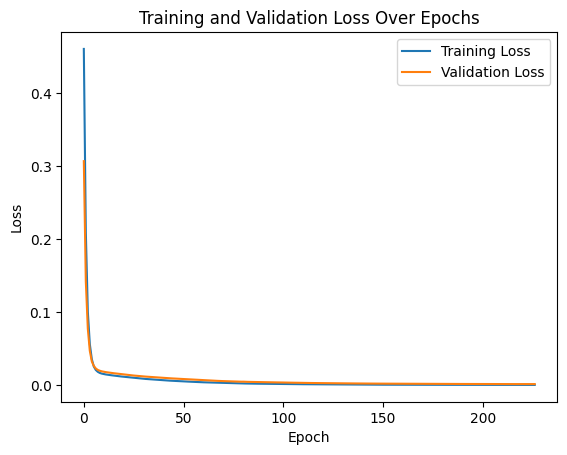

Epoch 1/218
63/63 [==============================] - 1s 7ms/step - loss: 5.6956e-04 - regression_head_loss: 5.6956e-04 - regression_head_mse: 2.4546e-04
Epoch 2/218
63/63 [==============================] - 0s 6ms/step - loss: 5.0512e-04 - regression_head_loss: 5.0512e-04 - regression_head_mse: 2.1539e-04
Epoch 3/218
63/63 [==============================] - 0s 5ms/step - loss: 4.5672e-04 - regression_head_loss: 4.5672e-04 - regression_head_mse: 1.9911e-04
Epoch 4/218
63/63 [==============================] - 0s 6ms/step - loss: 4.4014e-04 - regression_head_loss: 4.4014e-04 - regression_head_mse: 1.9679e-04
Epoch 5/218
63/63 [==============================] - 0s 5ms/step - loss: 4.2861e-04 - regression_head_loss: 4.2861e-04 - regression_head_mse: 2.0386e-04
Epoch 6/218
63/63 [==============================] - 0s 5ms/step - loss: 3.9701e-04 - regression_head_loss: 3.9701e-04 - regression_head_mse: 1.8616e-04
Epoch 7/218
63/63 [==============================] - 0s 5ms/step - loss: 3.7646e-0

In [9]:
# train now with the regression stage with balanced loss
history = mb.train_reg_head(extended_model, loader.X_train, loader.y_train, loader.reweights, learning_rate=1e-4,
                              epochs=400, batch_size=16)

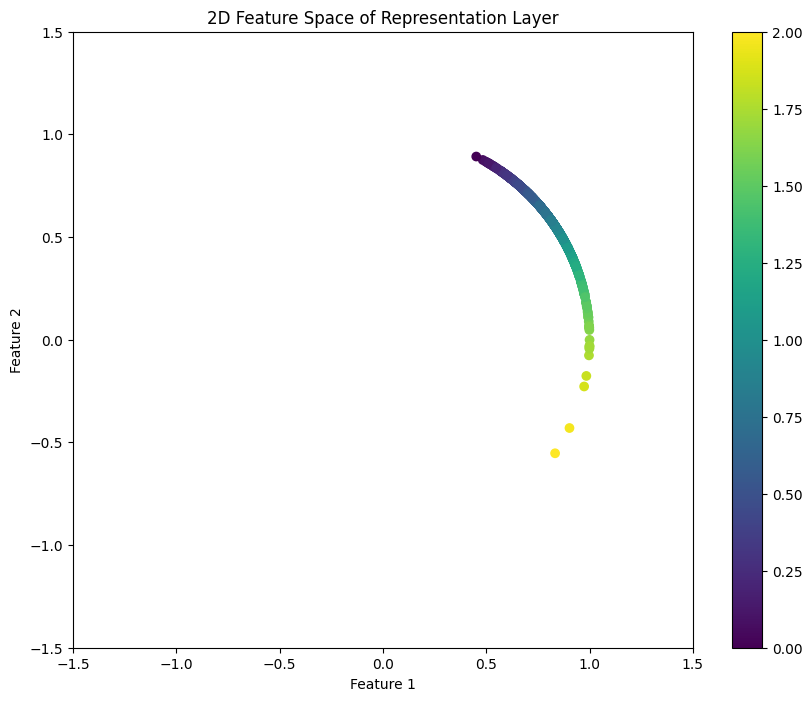

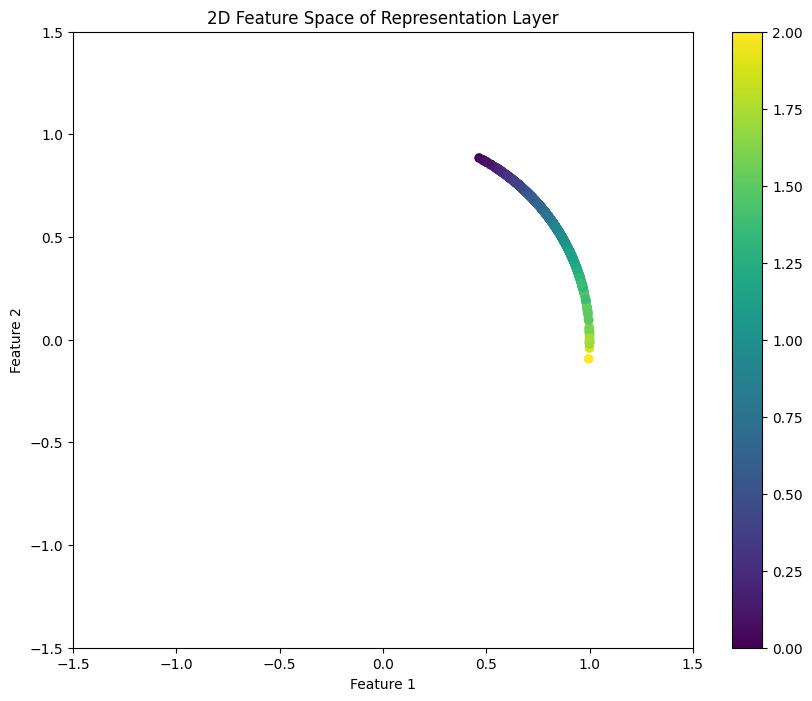

In [10]:
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)

In [ ]:
eva.evaluate(extended_model, loader.X_train, loader.y_train)

Mean Squared Error: 0.0004578082007355988
Root Mean Squared Error: 0.02139645256102085


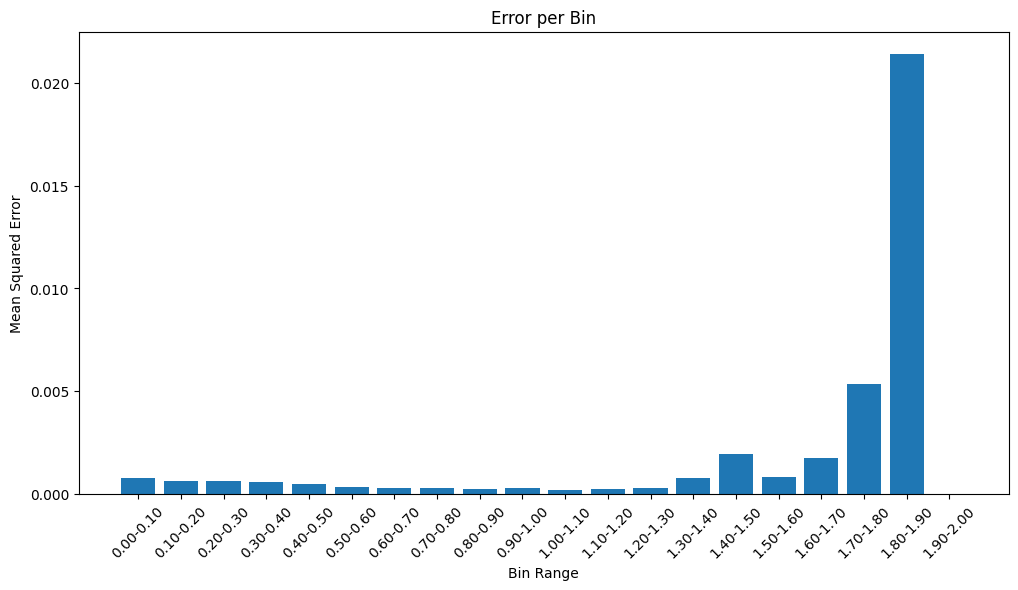

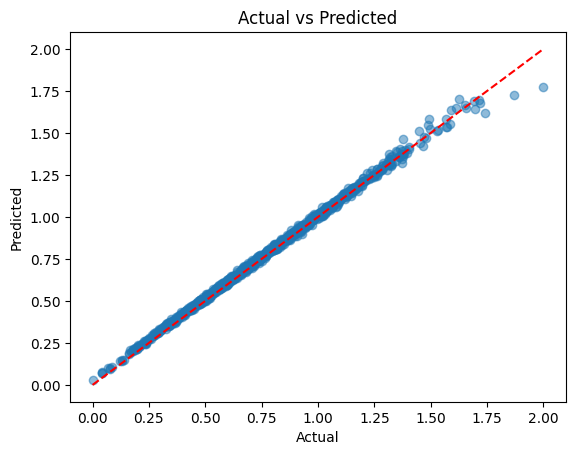

Sample with y = 1.3781939245040011 belongs to bin 14 and has an error of 0.08386259309701205
Sample with y = 1.4914006289943011 belongs to bin 15 and has an error of 0.09252247243086975
Sample with y = 1.739975615093097 belongs to bin 18 and has an error of 0.1185918288916199
Sample with y = 1.870703853135541 belongs to bin 19 and has an error of 0.14640132284684482
Sample with y = 2.0 belongs to bin 21 and has an error of 0.22859013080596924


0.0004578082

In [11]:
eva.evaluate(extended_model, loader.X_test, loader.y_test)

rRT

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/15
47/47 [==============================] - 2s 9ms/step - loss: 0.8296 - regression_head_loss: 0.8296 - val_loss: 0.6284 - val_regression_head_loss: 0.6284
Epoch 2/15
47/47 [==============================] - 0s 6ms/step - loss: 0.4704 - regression_head_loss: 0.4704 - val_loss: 0.4570 - val_regression_head_loss: 0.4570
Epoch 3/15
47/47 [==============================] - 0s 7ms/step - loss: 0.3414 - regression_head_loss: 0.3414 - val_loss: 0.3310 - val_regression_head_loss: 0.3310
Epoch 4/15
47/47 [==============================] - 0s 6ms/step - loss: 0.2492 - regression_head_loss: 0.2492 - val_loss: 0.2358 - val_regression_head_loss: 0.2358
Epoch 5/15
47/47 [==============================] - 0s 6ms/step - loss: 0.1871 - regression_head_loss: 0.1871 - val_loss: 0.1554 - val_regression_head_loss: 0.1554
Epoch 6/15
47/47 [==============================] - 0s 7ms/step - loss: 0.1463 - regression_head_loss: 0.1463 - val_loss: 0.126

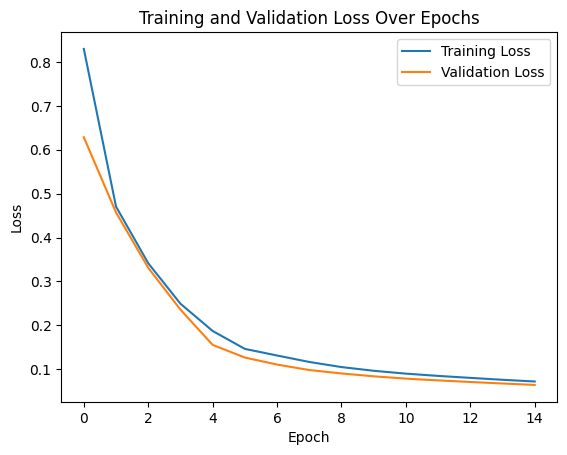

Epoch 1/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0669 - regression_head_loss: 0.0669
Epoch 2/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0634 - regression_head_loss: 0.0634
Epoch 3/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0605 - regression_head_loss: 0.0605
Epoch 4/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0577 - regression_head_loss: 0.0577
Epoch 5/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0553 - regression_head_loss: 0.0553
Epoch 6/15
63/63 [==============================] - 1s 8ms/step - loss: 0.0531 - regression_head_loss: 0.0531
Epoch 7/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0513 - regression_head_loss: 0.0513
Epoch 8/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0496 - regression_head_loss: 0.0496
Epoch 9/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0481 - regression_head_loss: 0.0481
Epoch 10/1

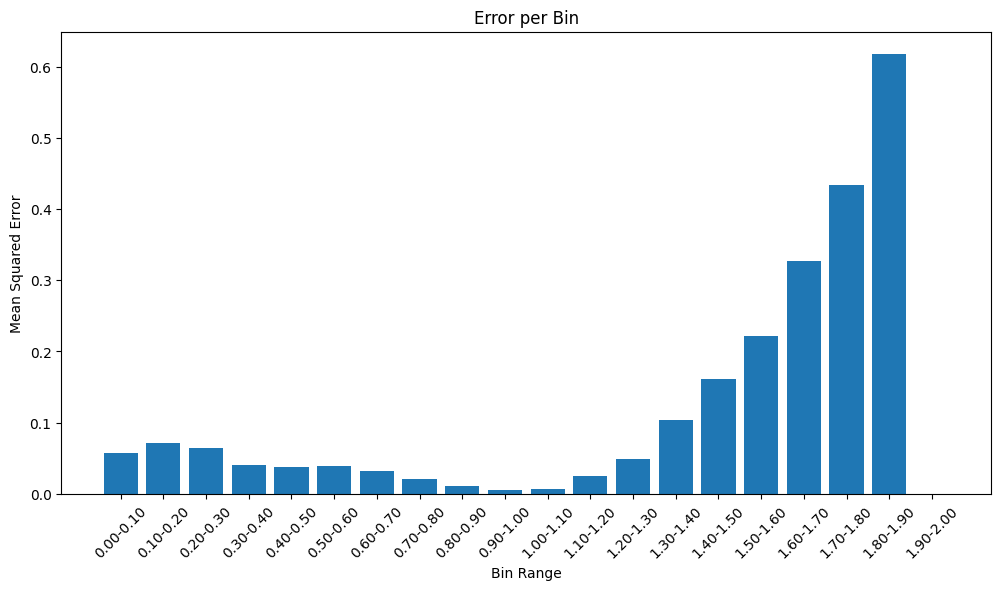

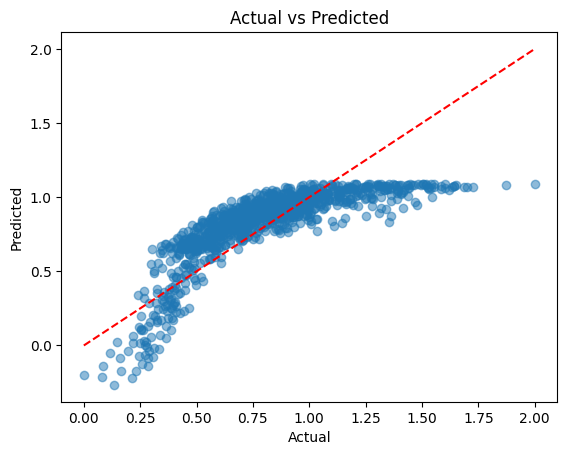

Sample with y = 1.6867952583215642 belongs to bin 17 and has an error of 0.6169135806940007
Sample with y = 1.699467012181184 belongs to bin 17 and has an error of 0.6277045695923777
Sample with y = 1.7276035706731971 belongs to bin 18 and has an error of 0.6585958163473304
Sample with y = 1.8720391717495213 belongs to bin 19 and has an error of 0.786405059391428
Sample with y = 2.0 belongs to bin 21 and has an error of 0.9131042957305908


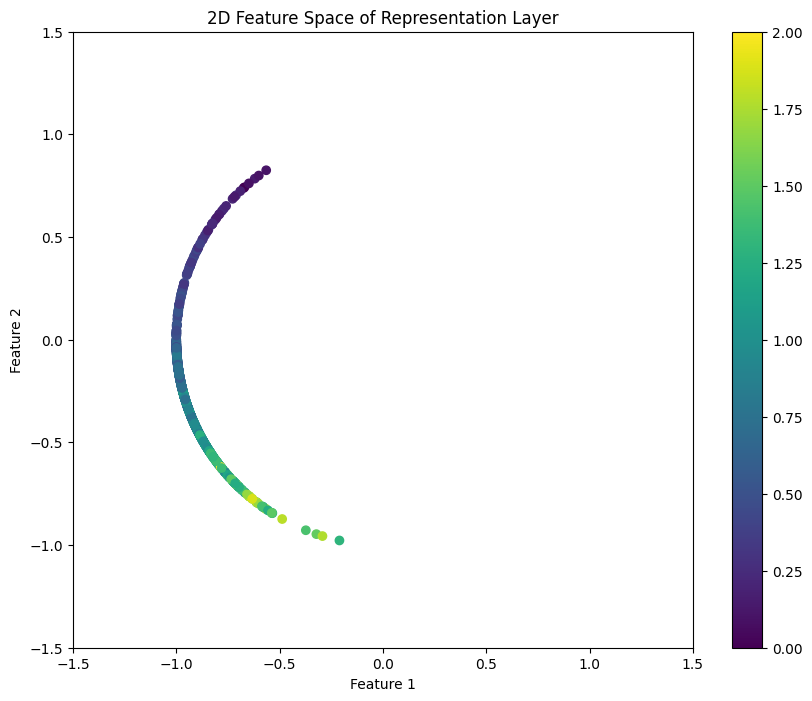

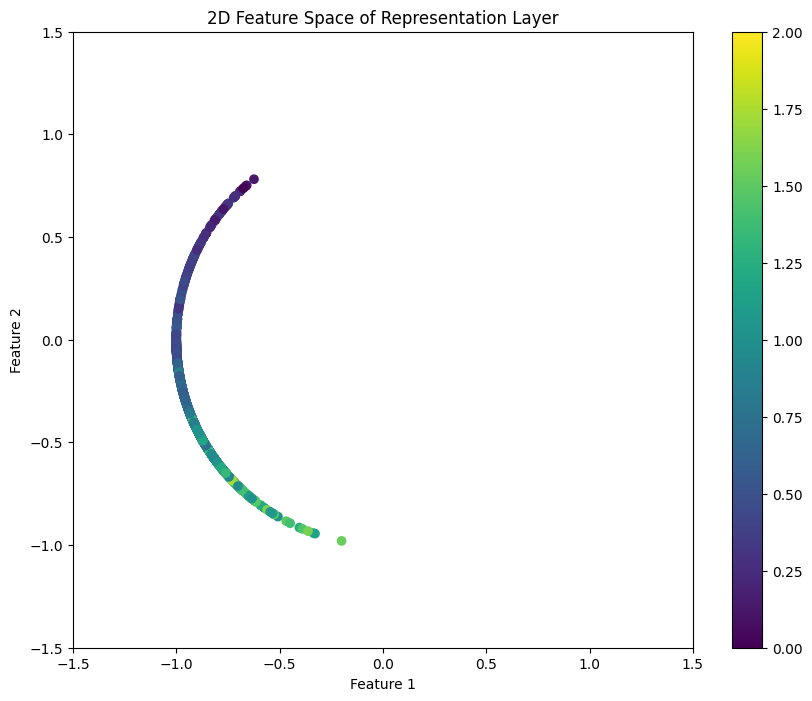

AssertionError: 

In [2]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_pds(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_reg_head(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=15, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_reg_head(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=15, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

rRT + AE

In [ ]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_pds(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_reg_head(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_reg_head(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

In [ ]:
# option 3 single stage training  training

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32)                0   

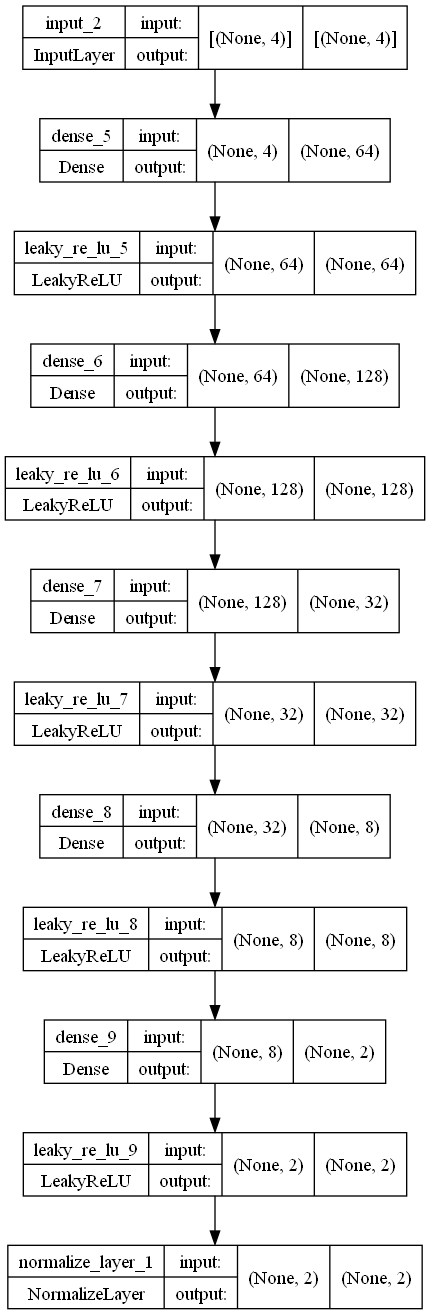

In [9]:
# Create and train the model
hiddens = [64, 128, 32, 8]
model2 = mb.create_model_pds(4, 2, hiddens)
# summarize and plot the model
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True)

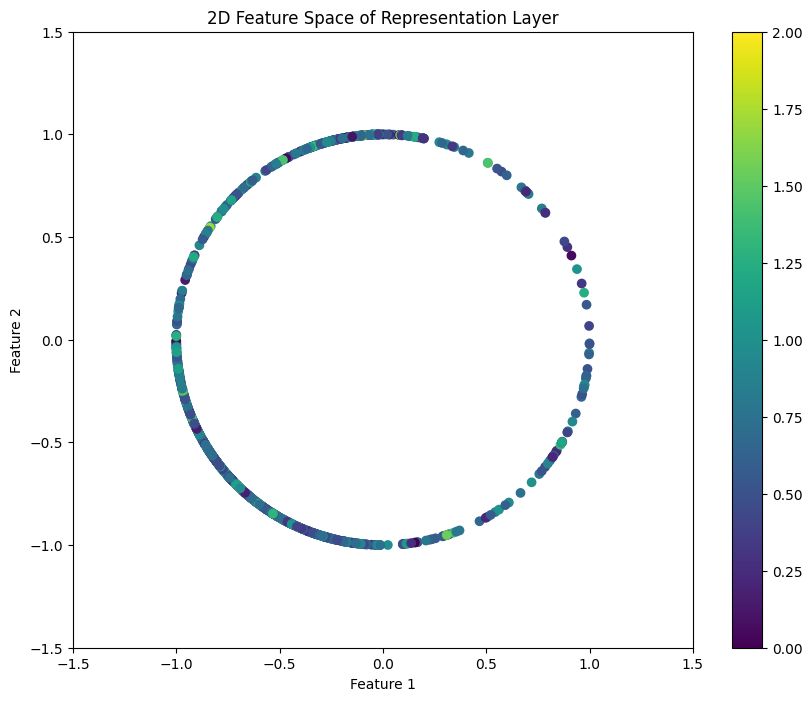

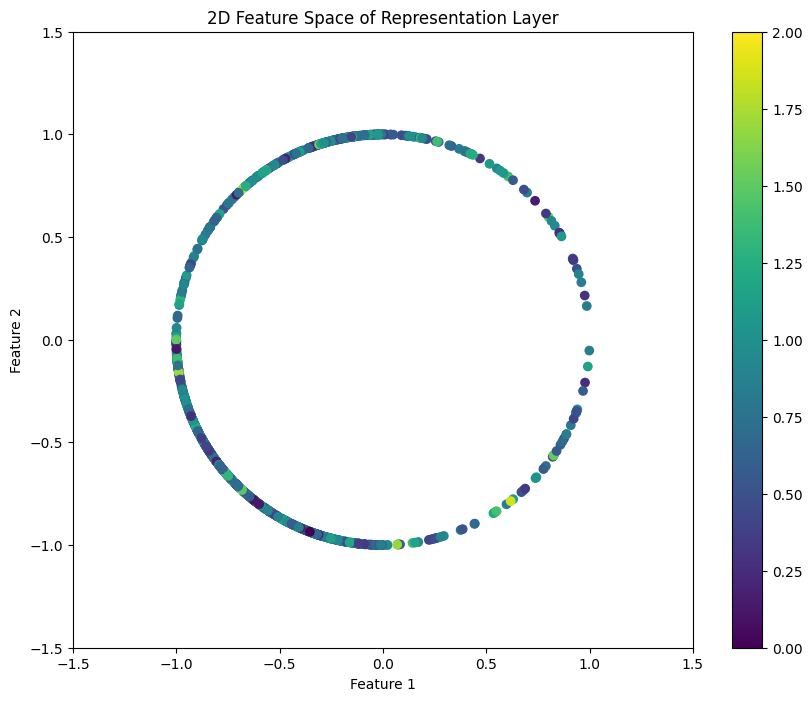

In [10]:
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 33s 707ms/step - loss: 0.2947 - val_loss: 0.1447
Epoch 2/400
44/44 [==============================] - 30s 692ms/step - loss: 0.1182 - val_loss: 0.1370
Epoch 3/400
44/44 [==============================] - 29s 669ms/step - loss: 0.1120 - val_loss: 0.1358
Epoch 4/400
44/44 [==============================] - 29s 660ms/step - loss: 0.1074 - val_loss: 0.1323
Epoch 5/400
44/44 [==============================] - 29s 665ms/step - loss: 0.1078 - val_loss: 0.1326
Epoch 6/400
44/44 [==============================] - 30s 672ms/step - loss: 0.0968 - val_loss: 0.1318
Epoch 7/400
44/44 [==============================] - 30s 681ms/step - loss: 0.1094 - val_loss: 0.1321
Epoch 8/400
44/44 [==============================] - 31s 714ms/step - loss: 0.1083 - val_loss: 0.1306
Epoch 9/400
44/44 [==============================] - 31s 709ms/step - loss: 0.1014 - val_loss: 0.1332
Epoch 10/400
44/44 [=========

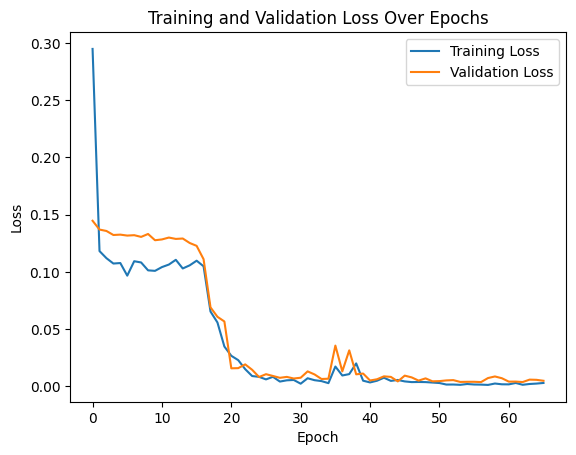

Epoch 1/57
63/63 [==============================] - 46s 714ms/step - loss: 0.0103
Epoch 2/57
63/63 [==============================] - 43s 680ms/step - loss: 0.0042
Epoch 3/57
63/63 [==============================] - 46s 723ms/step - loss: 0.0043
Epoch 4/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0055
Epoch 5/57
63/63 [==============================] - 43s 689ms/step - loss: 0.0052
Epoch 6/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0069
Epoch 7/57
63/63 [==============================] - 43s 684ms/step - loss: 0.0050
Epoch 8/57
63/63 [==============================] - 43s 682ms/step - loss: 0.0022
Epoch 9/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0149
Epoch 10/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0124
Epoch 11/57
63/63 [==============================] - 48s 762ms/step - loss: 0.0040
Epoch 12/57
63/63 [==============================] - 44s 704ms/step - loss: 0.0024
Epoch 13/57
6

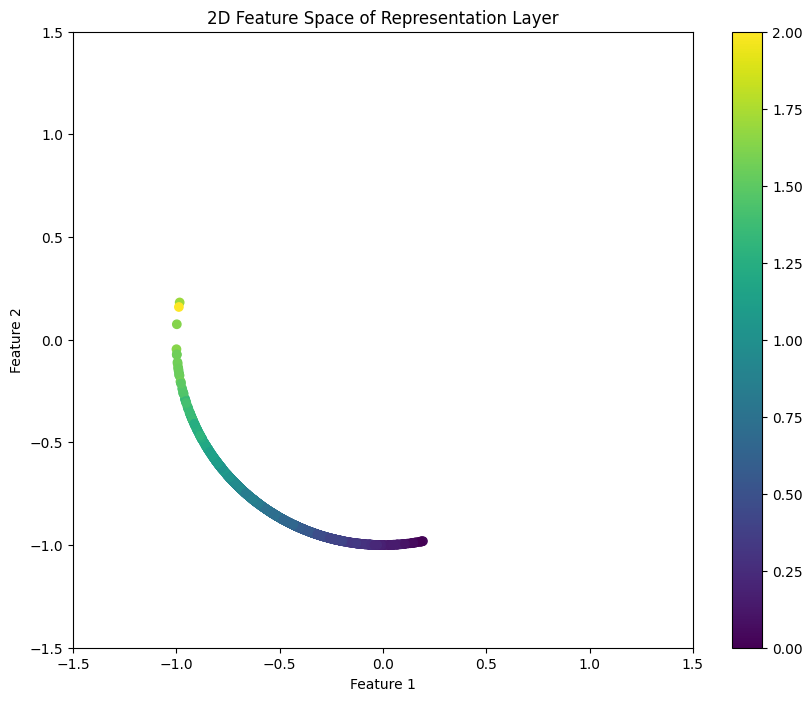

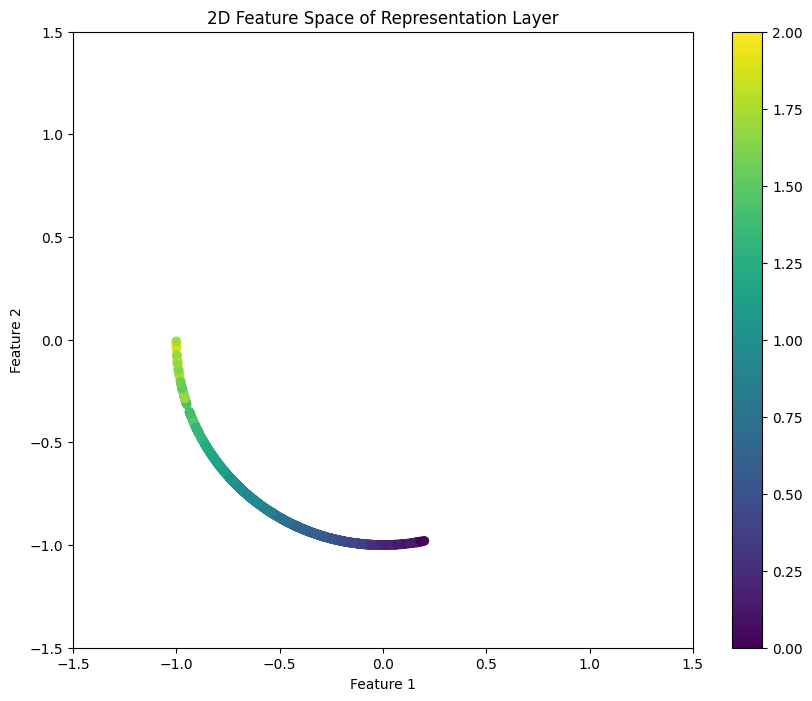

In [11]:
history = mb.train_pds(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

In [ ]:
history = mb.train_pds(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 12s 208ms/step - loss: 0.1974 - val_loss: 0.0196
Epoch 2/400
47/47 [==============================] - 9s 194ms/step - loss: 0.0641 - val_loss: 0.0165
Epoch 3/400
47/47 [==============================] - 9s 190ms/step - loss: 0.0643 - val_loss: 0.0202
Epoch 4/400
47/47 [==============================] - 9s 190ms/step - loss: 0.0625 - val_loss: 0.0178
Epoch 5/400
47/47 [==============================] - 9s 194ms/step - loss: 0.0639 - val_loss: 0.0132
Epoch 6/400
47/47 [==============================] - 9s 196ms/step - loss: 0.0616 - val_loss: 0.0135
Epoch 7/400
47/47 [==============================] - 9s 196ms/step - loss: 0.0579 - val_loss: 0.0271
Epoch 8/400
47/47 [==============================] - 9s 196ms/step - loss: 0.0678 - val_loss: 0.0316
Epoch 9/400
47/47 [==============================] - 10s 213ms/step - loss: 0.0590 - val_loss: 0.0087
Epoch 10/400
47/47 [================

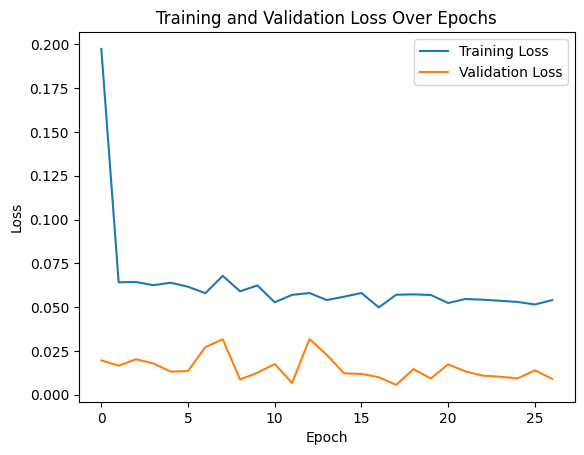

Epoch 1/18
63/63 [==============================] - 12s 164ms/step - loss: 0.0603
Epoch 2/18
63/63 [==============================] - 12s 185ms/step - loss: 0.0576
Epoch 3/18
63/63 [==============================] - 12s 185ms/step - loss: 0.0528
Epoch 4/18
63/63 [==============================] - 12s 183ms/step - loss: 0.0522
Epoch 5/18
63/63 [==============================] - 12s 186ms/step - loss: 0.0621
Epoch 6/18
63/63 [==============================] - 12s 189ms/step - loss: 0.0395
Epoch 7/18
63/63 [==============================] - 12s 185ms/step - loss: 0.0311
Epoch 8/18
63/63 [==============================] - 12s 193ms/step - loss: 0.0279
Epoch 9/18
63/63 [==============================] - 12s 187ms/step - loss: 0.0146
Epoch 10/18
63/63 [==============================] - 12s 188ms/step - loss: 0.0074
Epoch 11/18
63/63 [==============================] - 12s 190ms/step - loss: 0.0049
Epoch 12/18
63/63 [==============================] - 12s 189ms/step - loss: 0.0038
Epoch 13/18
6

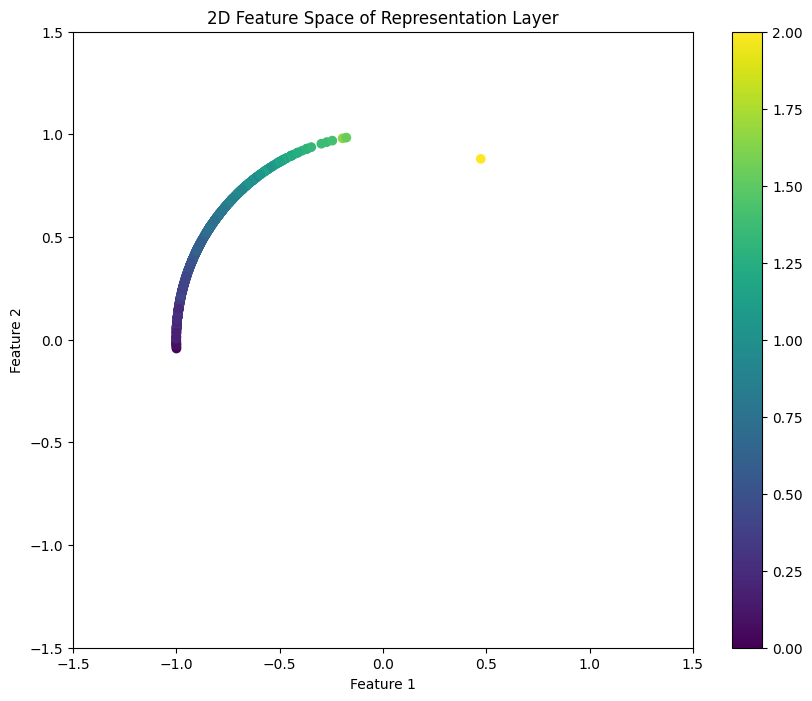

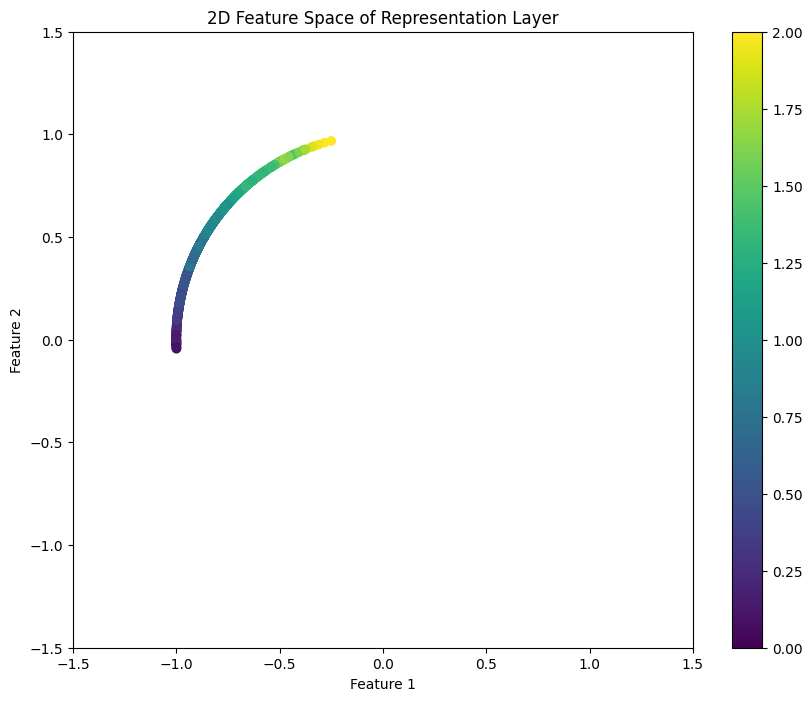

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 16ms/step - loss: 1.4297 - regression_head_loss: 1.4297 - val_loss: 1.1834 - val_regression_head_loss: 1.1834
Epoch 2/400
47/47 [==============================] - 1s 11ms/step - loss: 1.0178 - regression_head_loss: 1.0178 - val_loss: 0.8573 - val_regression_head_loss: 0.8573
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.7536 - regression_head_loss: 0.7536 - val_loss: 0.6499 - val_regression_head_loss: 0.6499
Epoch 4/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5768 - regression_head_loss: 0.5768 - val_loss: 0.5011 - val_regression_head_loss: 0.5011
Epoch 5/400
47/47 [==============================] - 0s 8ms/step - loss: 0.4401 - regression_head_loss: 0.4401 - val_loss: 0.3725 - val_regression_head_loss: 0.3725
Epoch 6/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3152 - regression_head_loss: 0.3152 - val_los

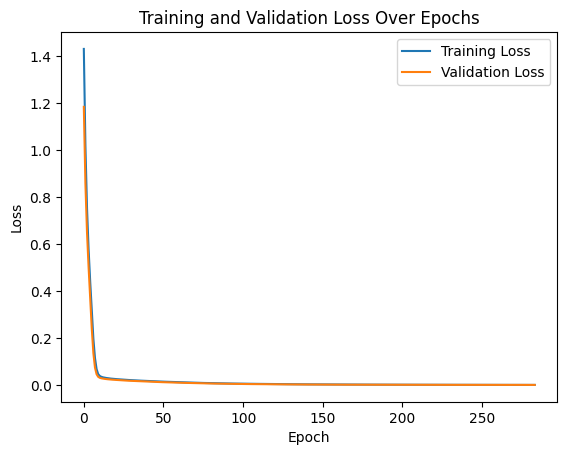

Epoch 1/275
63/63 [==============================] - 0s 7ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 2/275
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 3/275
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 4/275
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 5/275
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 6/275
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 7/275
63/63 [==============================] - 1s 9ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 8/275
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 9/275
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
E

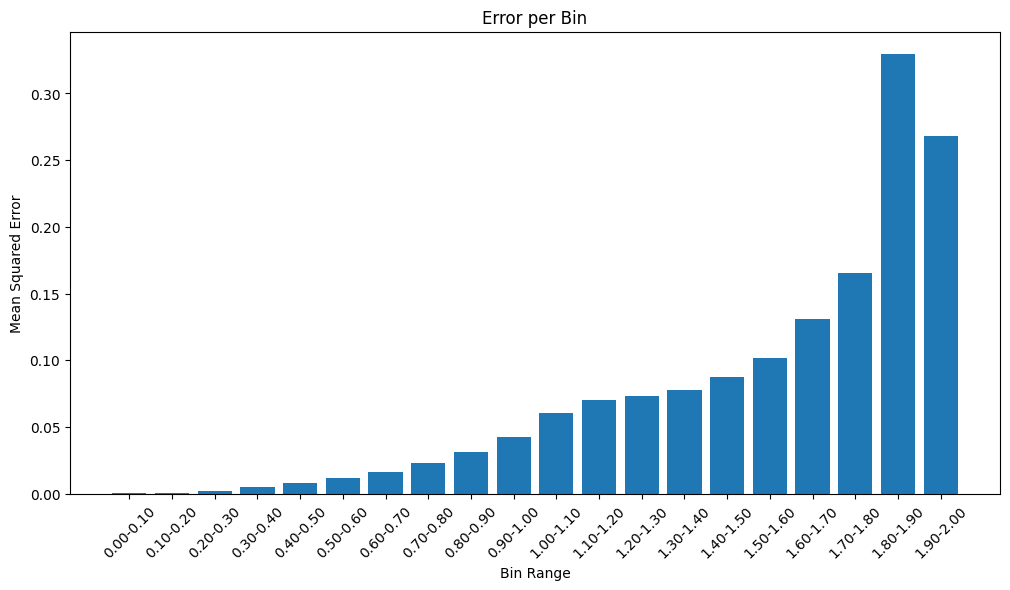

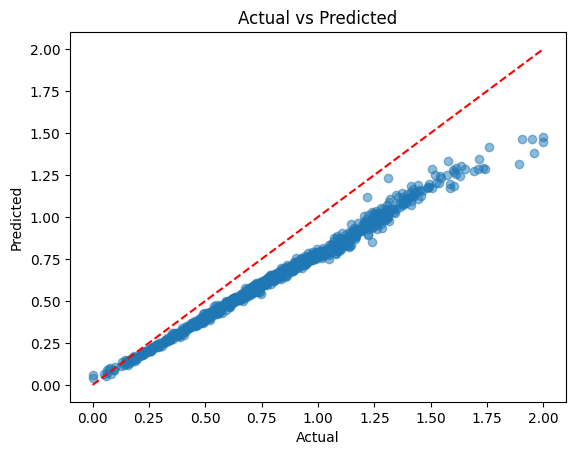

Sample with y = 1.9477685667496525 belongs to bin 20 and has an error of 0.483693716667255
Sample with y = 2.0 belongs to bin 21 and has an error of 0.5255750417709351
Sample with y = 1.9992346799424845 belongs to bin 20 and has an error of 0.5514589583924967
Sample with y = 1.8921610728948524 belongs to bin 19 and has an error of 0.5742217914312293
Sample with y = 1.9587857094864591 belongs to bin 20 and has an error of 0.580731329069589


In [8]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test, alpha=.7)

mb = mbuilder()

eva = ev()

# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_pds(4, 2, hiddens)
# summarize and plot the model
# model.summary()

history = mb.train_pds(
    model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-3, 
    epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_reg_head(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=400, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)